In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Downloads/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.shape

(1460, 81)

In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,...,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,...,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,...,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,...,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,...,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,...,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,...,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
# finding non-null values in each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df['Alley'].isnull().sum()

1369

# finding columns with null values and % of null values

In [40]:
NA_Col= [i for i in df.columns if df[i].isnull().sum()>1]

In [41]:
for i in NA_Col:
    print(i)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [37]:
a=df['PoolQC'].isnull().mean()*100
a

99.52054794520548

In [38]:
b=np.round(df['PoolQC'].isnull().mean(),4)*100
b

99.52

In [39]:
for i in NA_Col:
    print(i, np.rounddf[i].isnull().mean()*100, '% null values')

LotFrontage 17.740000000000002 % null values
Alley 93.77 % null values
MasVnrType 0.5499999999999999 % null values
MasVnrArea 0.5499999999999999 % null values
BsmtQual 2.53 % null values
BsmtCond 2.53 % null values
BsmtExposure 2.6 % null values
BsmtFinType1 2.53 % null values
BsmtFinType2 2.6 % null values
FireplaceQu 47.260000000000005 % null values
GarageType 5.55 % null values
GarageYrBlt 5.55 % null values
GarageFinish 5.55 % null values
GarageQual 5.55 % null values
GarageCond 5.55 % null values
PoolQC 99.52 % null values
Fence 80.75 % null values
MiscFeature 96.3 % null values


# Impact of NA_Col on dependent Variable

In [44]:
# Docstring:
# where(condition, [x, y], /)
# Return elements chosen from `x` or `y` depending on `condition`.
a=np.where(df['Alley'].isnull(),1,0)
a

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# #calculate sum of points for each team
# df_groups = df.groupby(['team'])['points'].sum()

# #create bar plot with custom aesthetics
# df_groups.plot(kind='bar', title='Total Points by Team',
#                ylabel='Total Points', xlabel='Team', figsize=(10, 6))

In [54]:
# Calculating average sale price for groups in Alley
b=df.groupby('Alley')['SalePrice'].mean()
b

Alley
Grvl    122219.080000
Pave    168000.585366
Name: SalePrice, dtype: float64

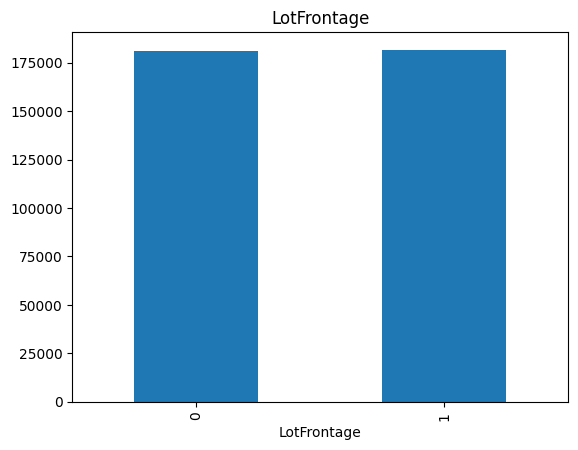

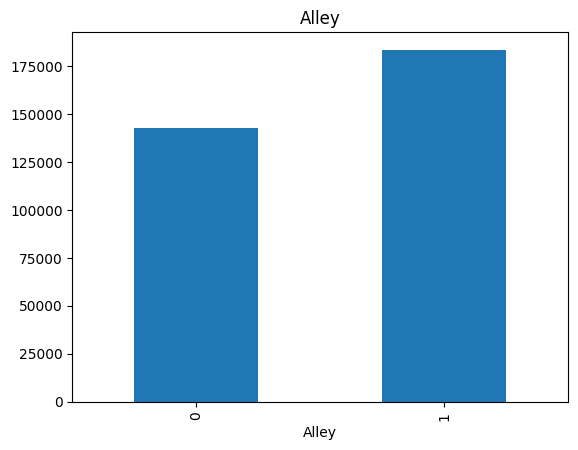

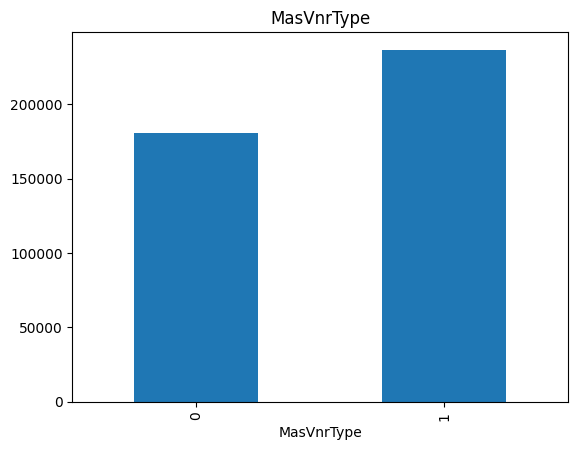

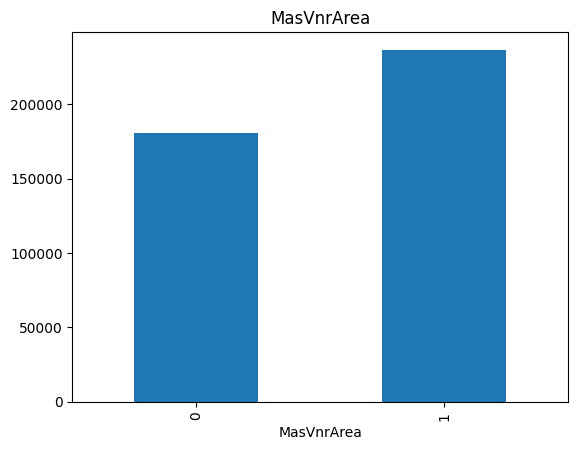

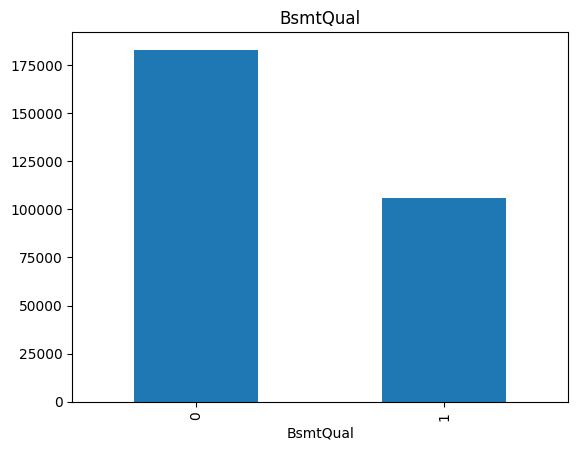

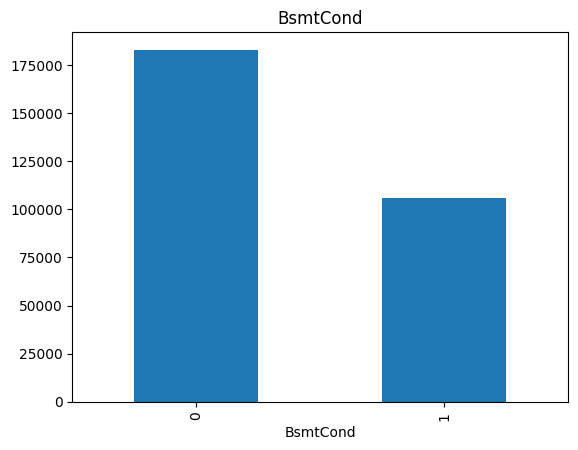

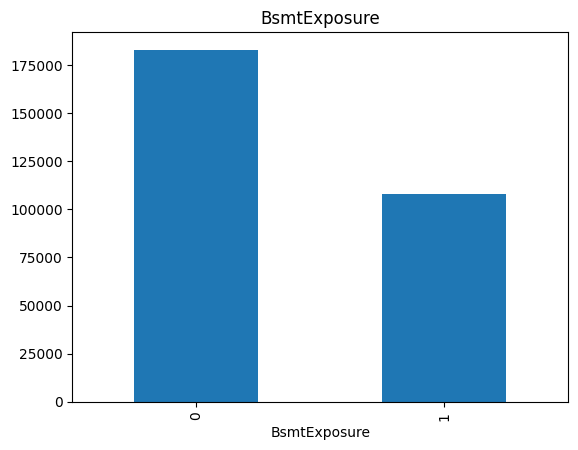

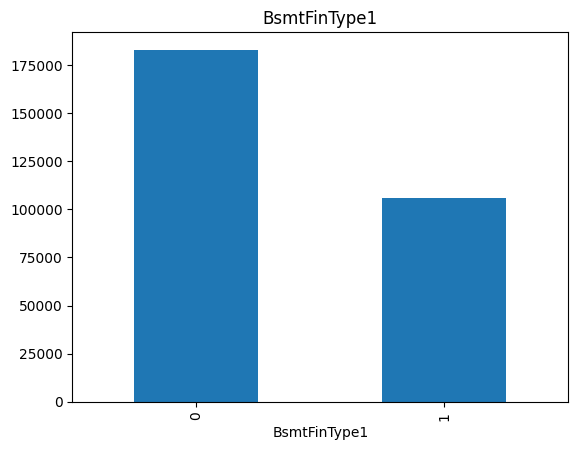

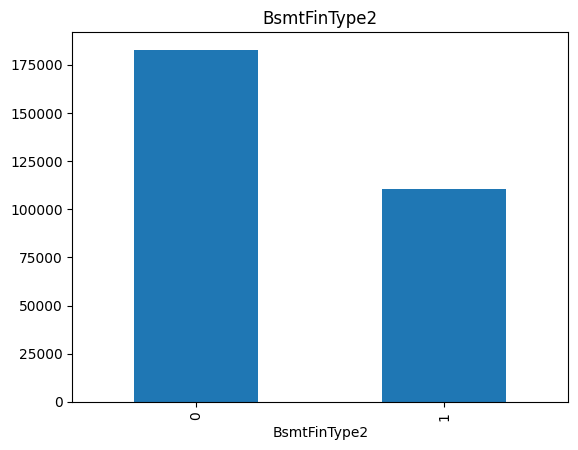

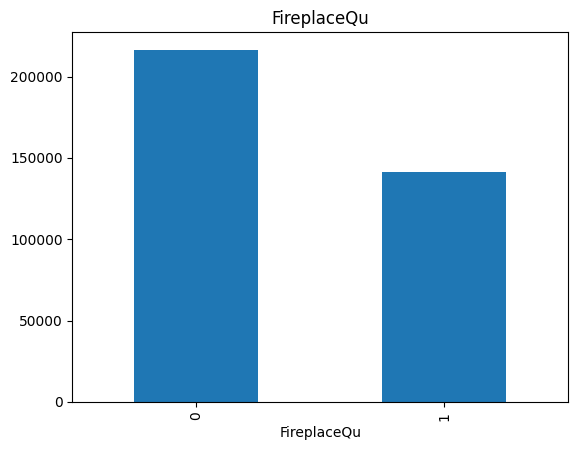

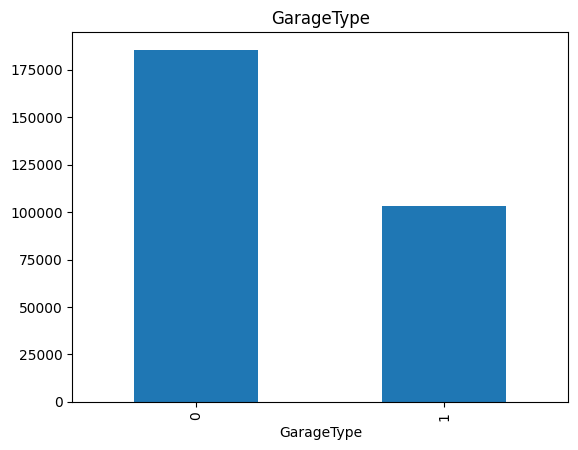

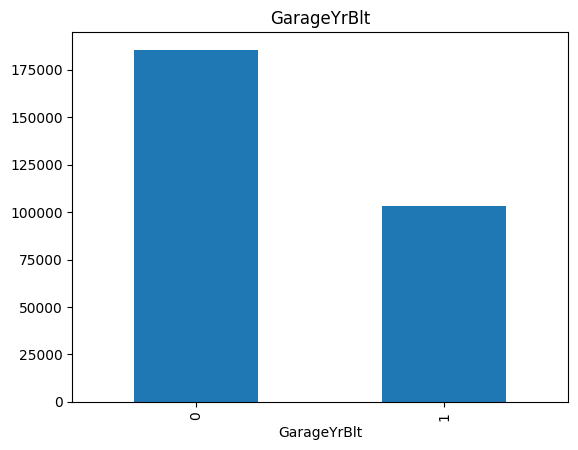

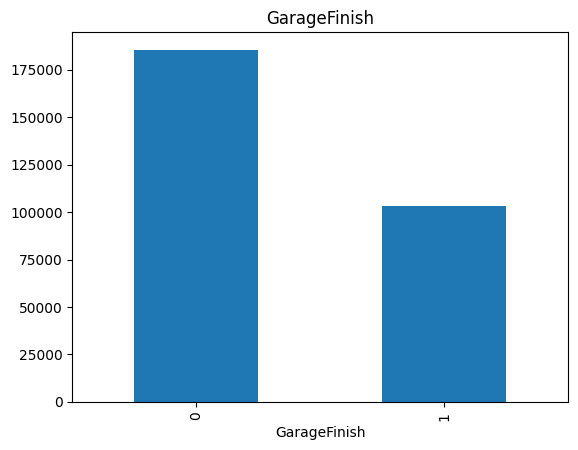

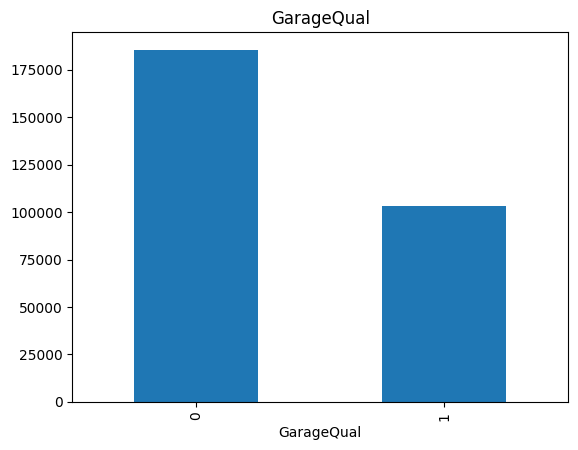

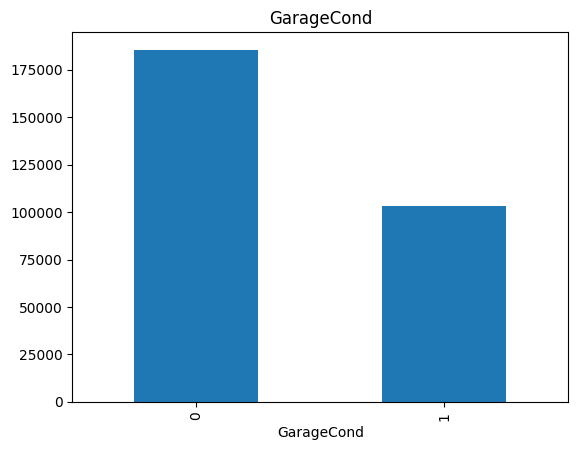

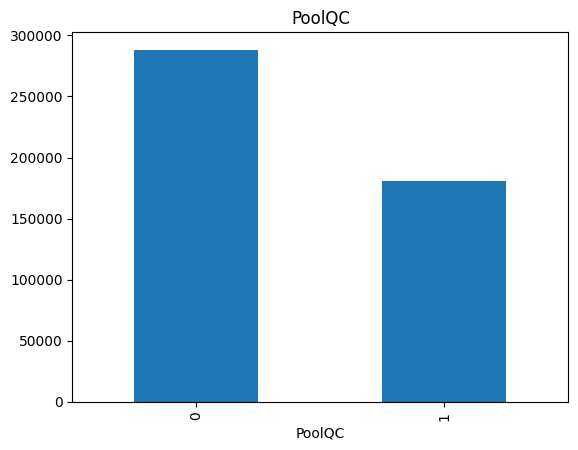

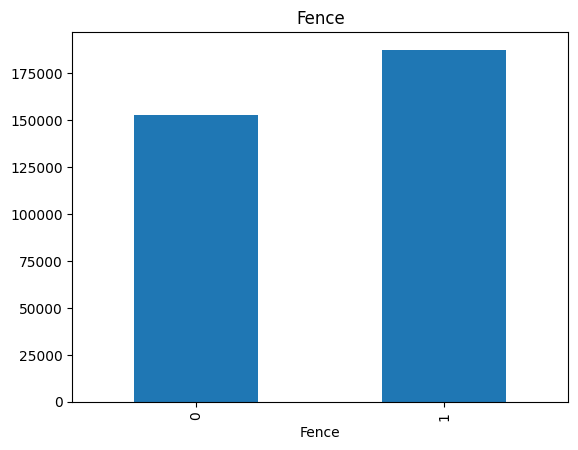

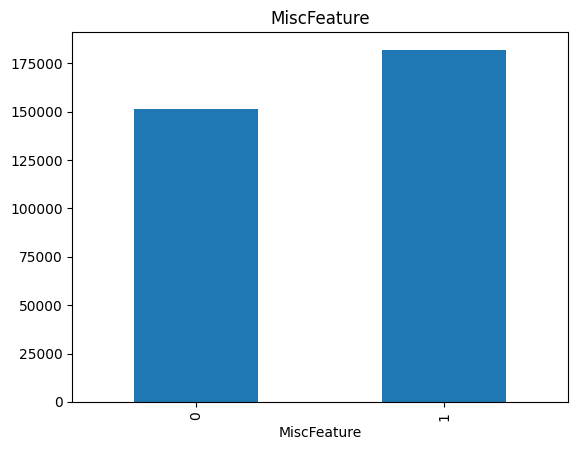

In [55]:
# make a variable that indicates 1 if the observation was missing or zero otherwise
for i in NA_Col:
    data=df.copy()
#     no change made in original data using copy for visualization
    data[i]=np.where(data[i].isnull(), 1, 0)
#     grouping NA_Col on basis of mean value of dependent variable and plotting graph
    data.groupby(i)['SalePrice'].mean().plot.bar()
    plt.title(i)
    plt.show()

# Finding numerical features 

In [58]:
num_col= [i for i in df.columns if df[i].dtypes!='O']

In [61]:
num_col[0:5]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']

In [63]:
df[num_col].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,...,0,0,2,2008,208500
1,2,20,80.0,9600,6,...,0,0,5,2007,181500
2,3,60,68.0,11250,7,...,0,0,9,2008,223500
3,4,70,60.0,9550,7,...,0,0,2,2006,140000
4,5,60,84.0,14260,8,...,0,0,12,2008,250000


In [67]:
yr_col=[i for i in df.columns if 'Yr' in i or 'Year' in i]
yr_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold'>

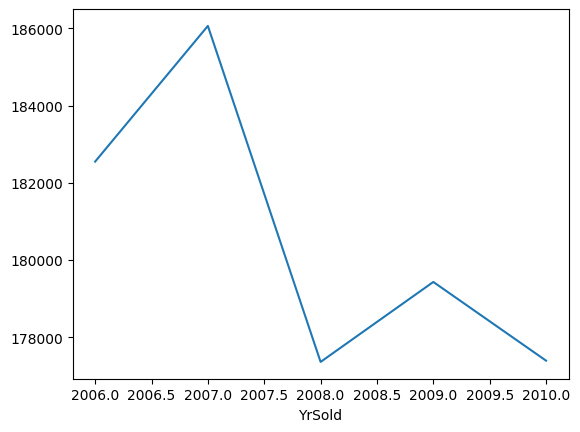

In [73]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price
df.groupby("YrSold")["SalePrice"].mean().plot()
# default is line chart. Below gives different result
# df.groupby("YrSold")["SalePrice"].mean().plot
# df.groupby("YrSold")["SalePrice"].mean().plot.bar()
# df.groupby("YrSold")["SalePrice"].plot()

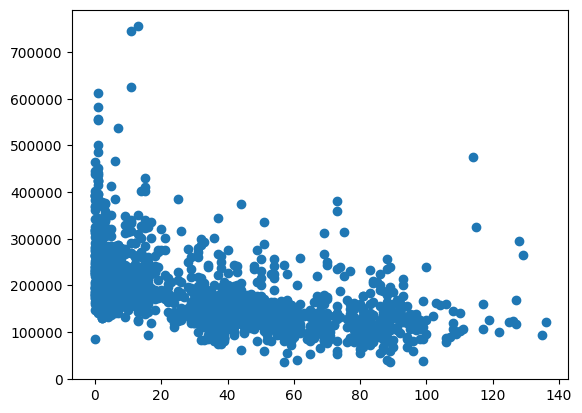

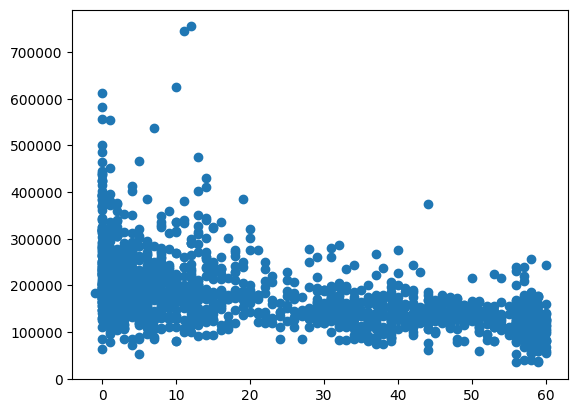

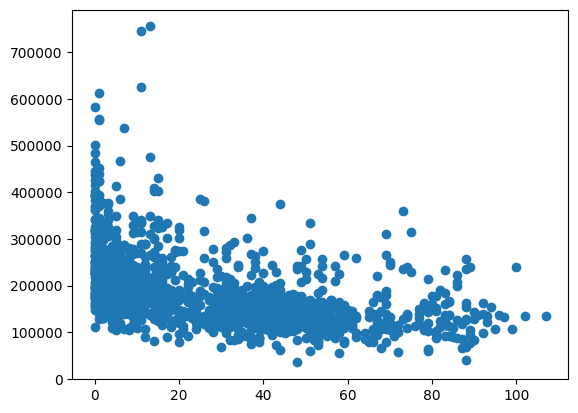

In [90]:
for i in yr_col:
#     data=df.copy()
    if i!= 'YrSold':
        data=df.copy()
        data[i]=data['YrSold']-data[i]
#     data.groupby([i])['SalePrice'].plot()
        
        plt.scatter(data[i],data['SalePrice'])
#         plt.xlabel(i)
#         plt.ylabel('SalePrice')
        plt.show()


# num_col = discrete cols+continuous cols
# to find discrete columns, filter out num cols where distinct value in a column is less than 20 or  25 values


In [103]:
# dis_col=[i for i in num_col if len(df[i].unique())<20 and i not in yr_col+['Id']]
dis_col=[i for i in num_col if df[i].nunique()<20 and i not in yr_col+['Id']]
dis_col

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [111]:
for i in dis_col:
    print(i, "has distinct values",df[i].nunique())

MSSubClass has distinct values 15
OverallQual has distinct values 10
OverallCond has distinct values 9
BsmtFullBath has distinct values 4
BsmtHalfBath has distinct values 3
FullBath has distinct values 4
HalfBath has distinct values 3
BedroomAbvGr has distinct values 8
KitchenAbvGr has distinct values 4
TotRmsAbvGrd has distinct values 12
Fireplaces has distinct values 4
GarageCars has distinct values 5
PoolArea has distinct values 8
MoSold has distinct values 12


In [104]:
df[dis_col].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,...,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,...,8,0,2,0,2
1,20,6,8,0,1,...,6,1,2,0,5
2,60,7,5,1,0,...,6,1,2,0,9
3,70,7,5,1,0,...,7,1,3,0,2
4,60,8,5,1,0,...,9,1,3,0,12


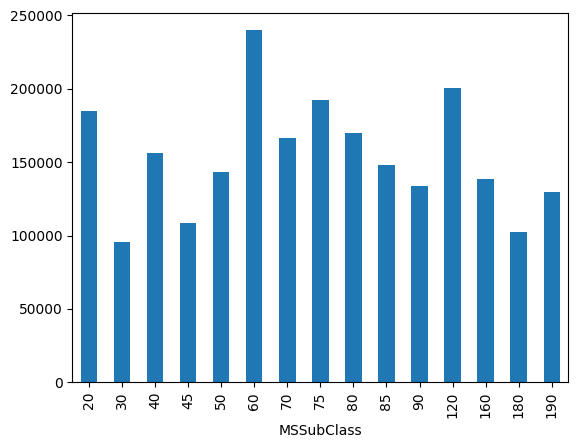

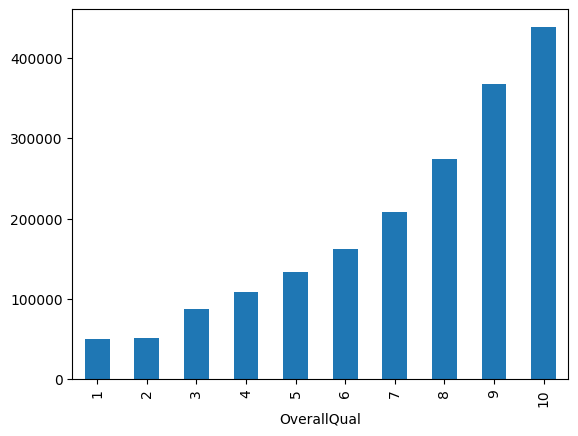

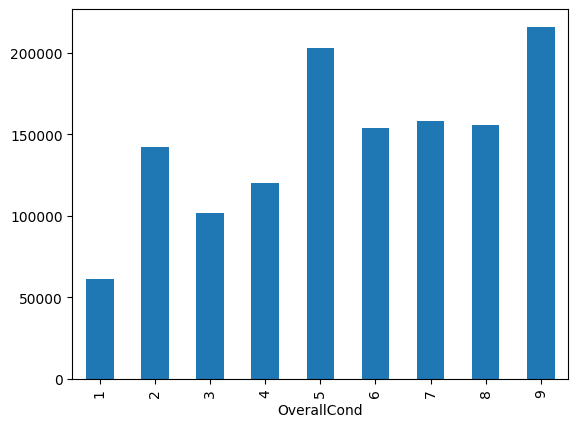

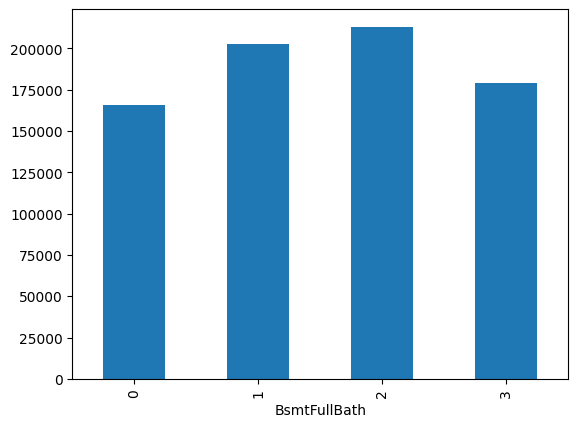

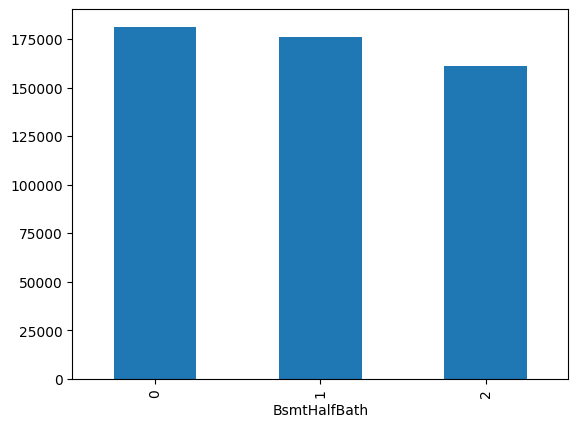

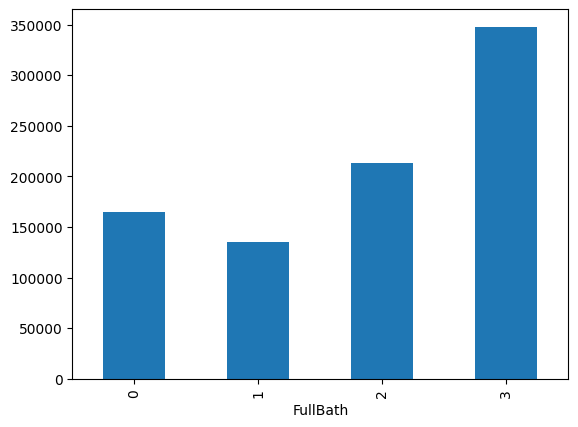

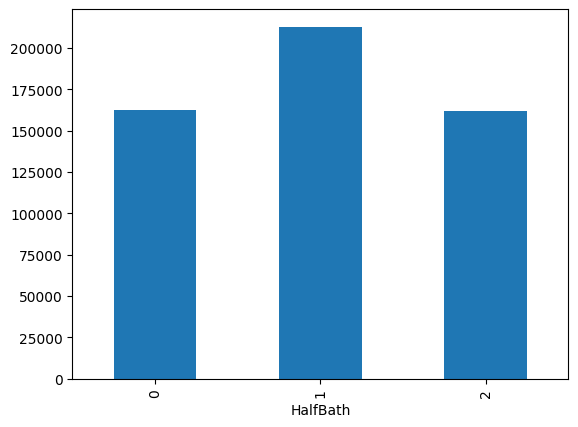

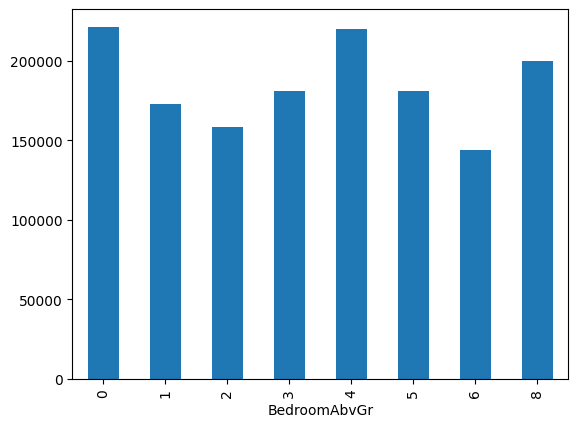

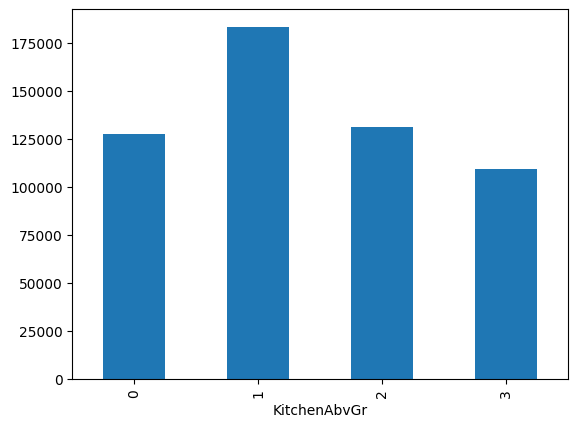

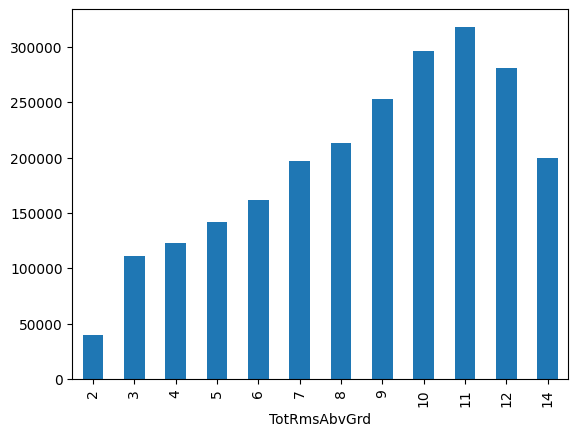

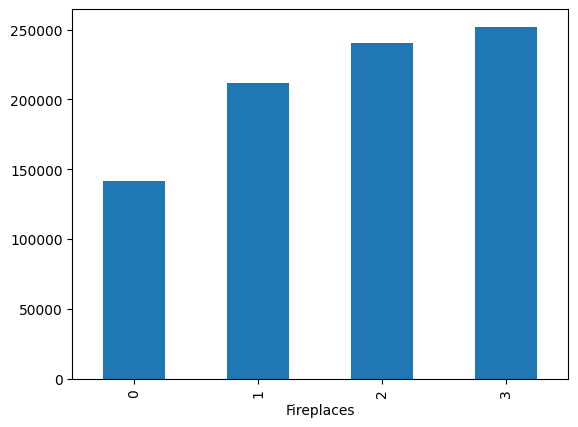

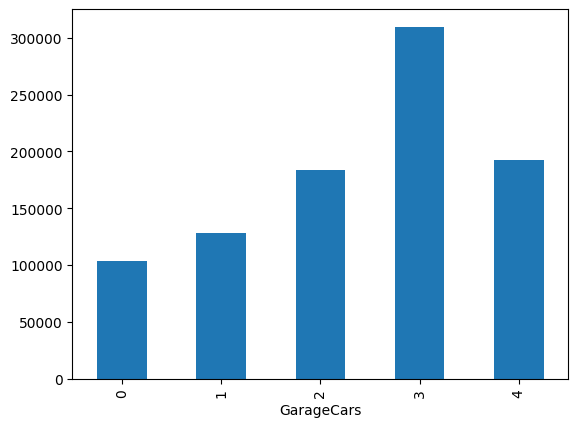

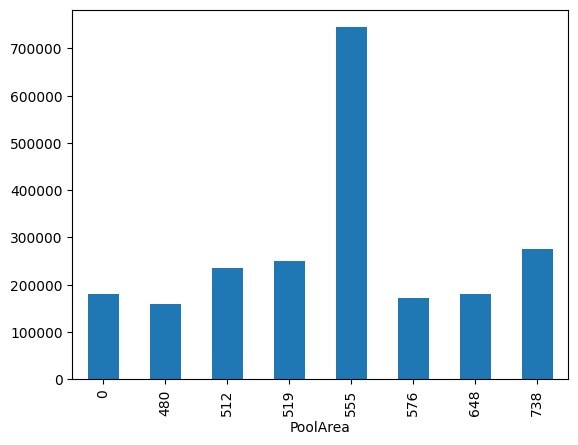

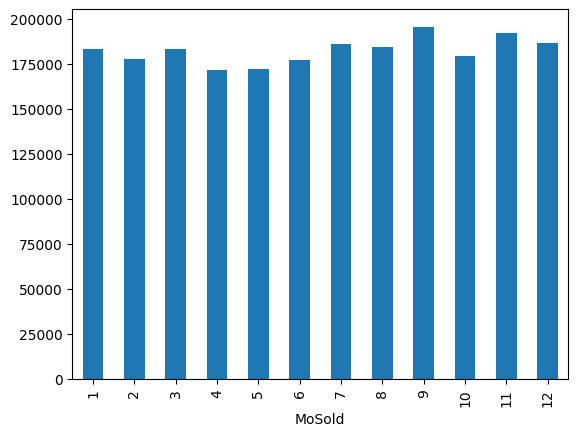

In [115]:
for i in dis_col:
    data=df.copy()
#       df.groupby(data[i])['SalePrice'].plot.bar() will show sale price for each dis_col in bar graph form

    a=df.groupby(data[i])['SalePrice'].mean()
    a.plot.bar()
    plt.xlabel(i)
    plt.show()

In [130]:
#
# print(data['OverallCond'].unique)
print(type(data['Alley'].unique))

<class 'method'>


# Continuous Variable

In [135]:

con_col=[i for i in num_col if i not in dis_col+yr_col+['Id']]
len(con_col)

19

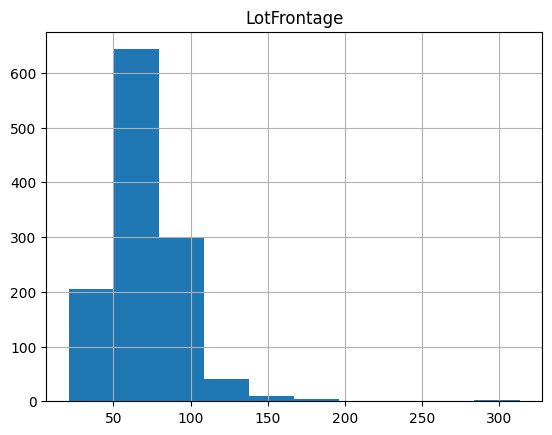

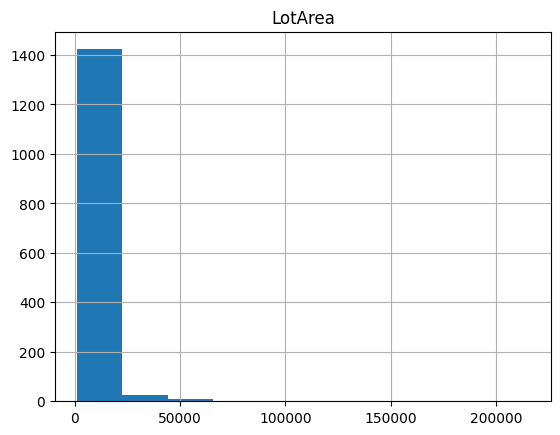

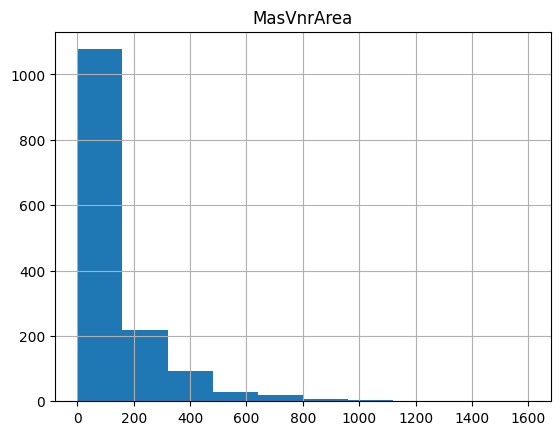

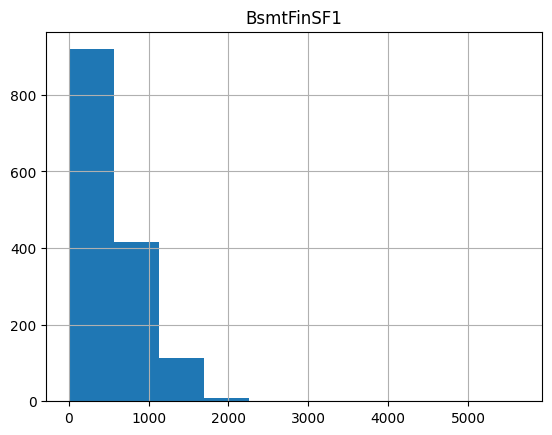

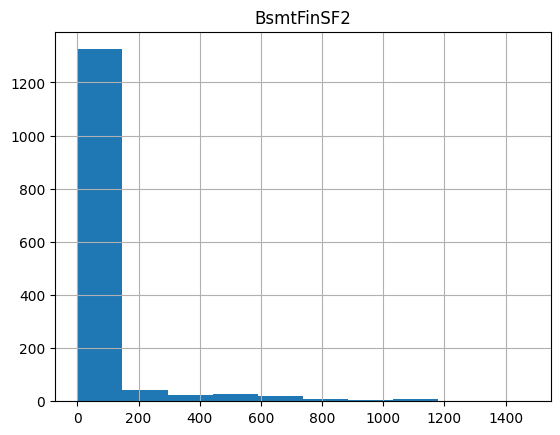

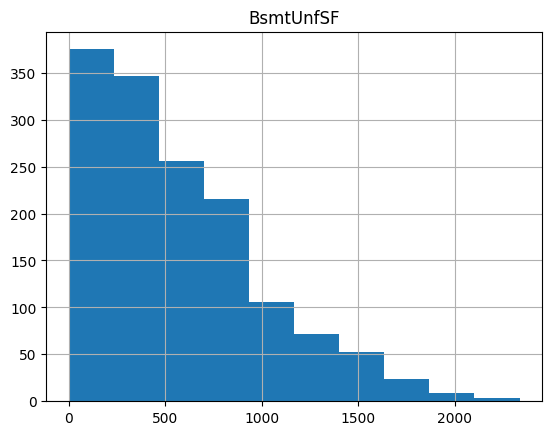

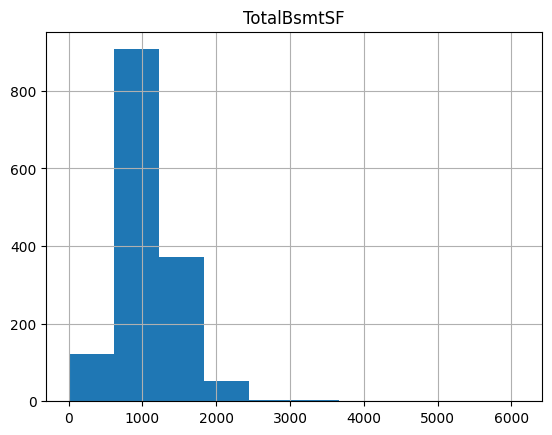

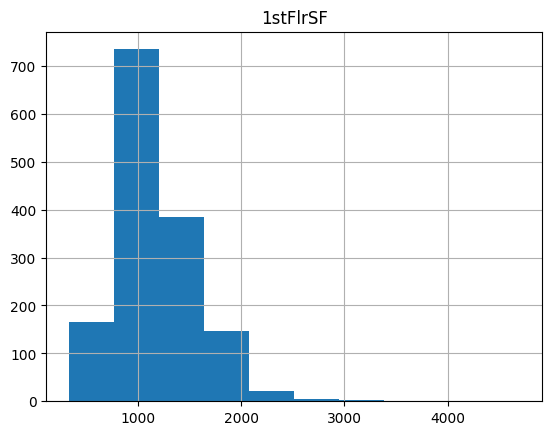

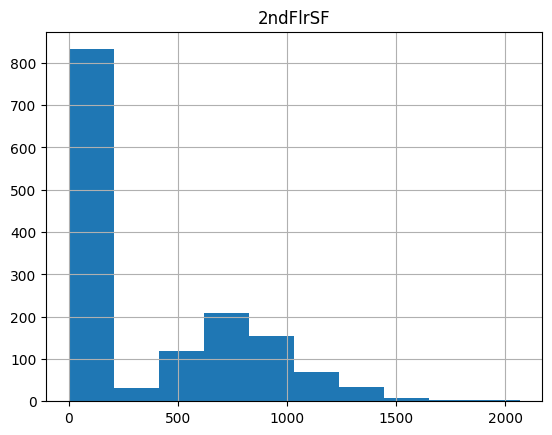

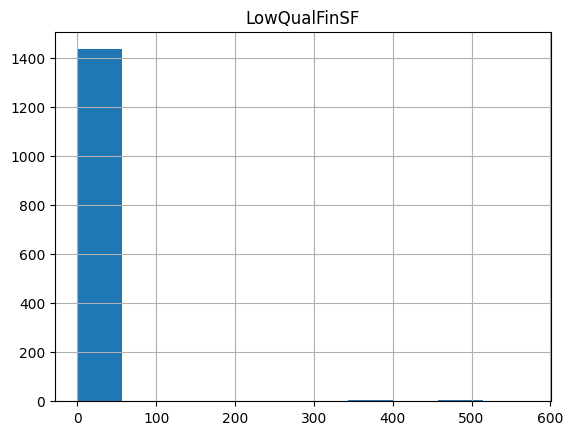

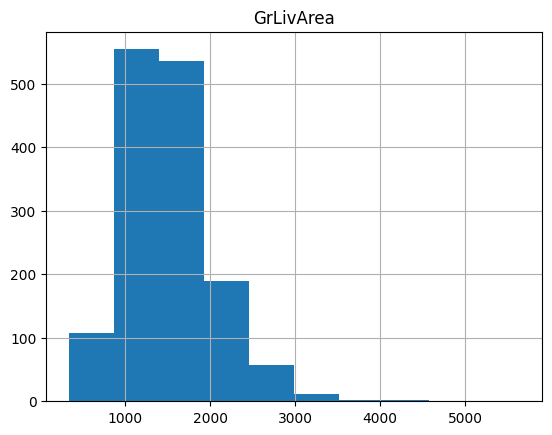

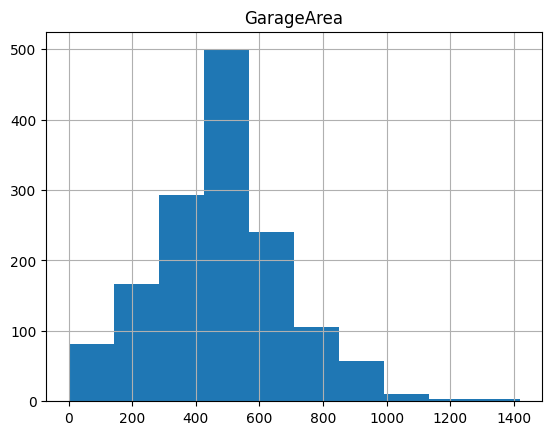

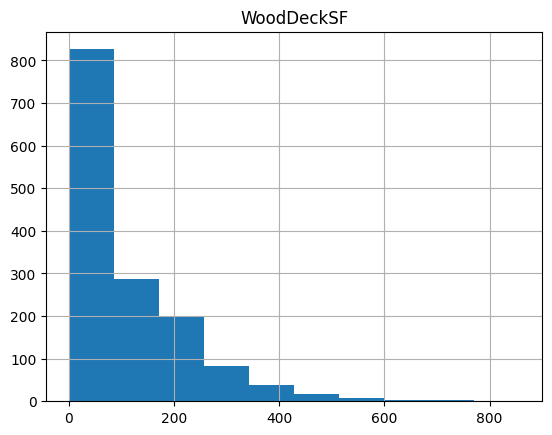

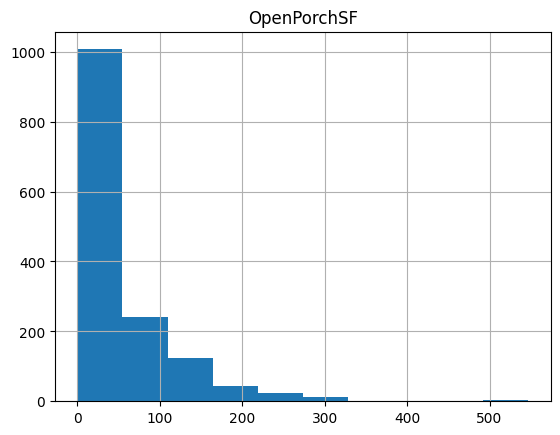

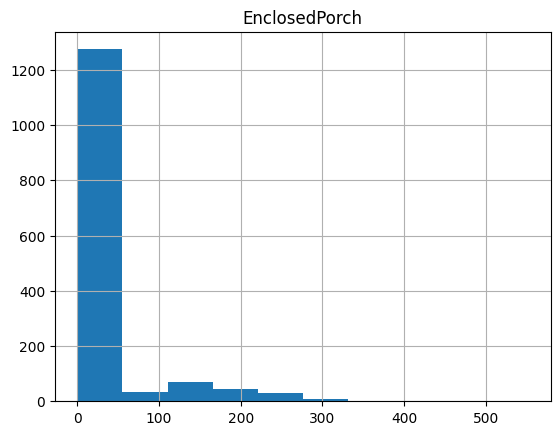

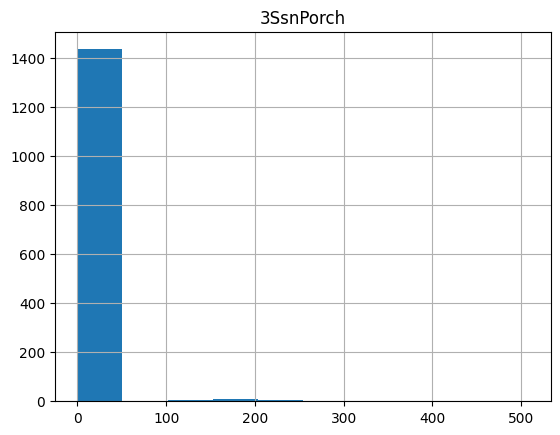

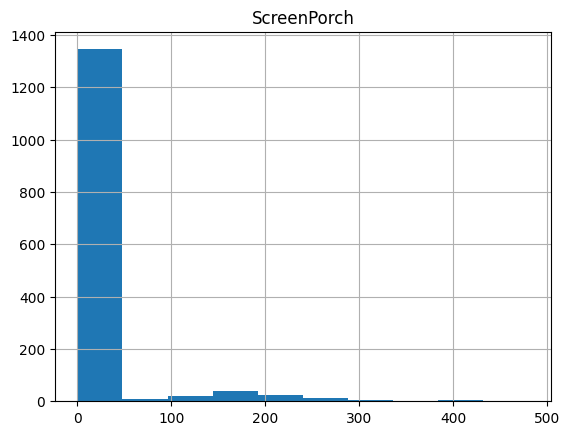

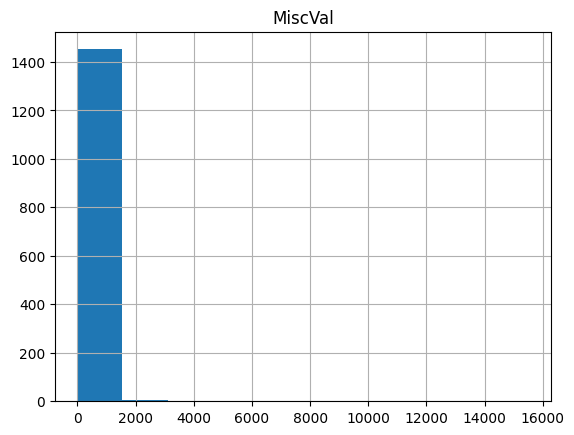

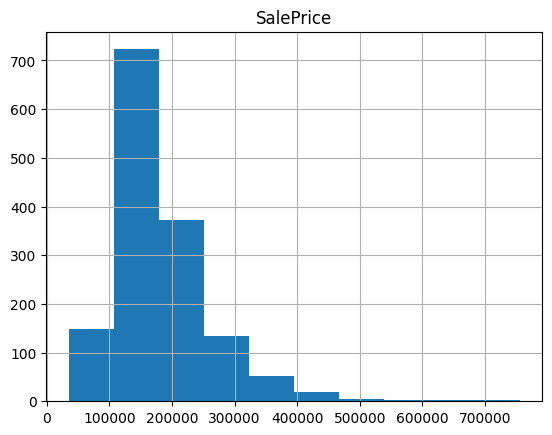

In [172]:
# check data distribution using bar plot 
for i in con_col:
    data=df.copy()
#     data[i]=data.groupby([i])['SalePrice'].plot.hist() means grouping the feature on the basis of each category(each distinct record) with SalePrice and plotting histogram.   
    data[i].hist()
    plt.title(i)
    plt.show()

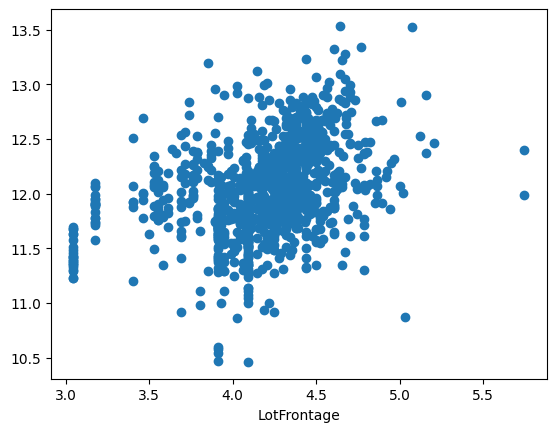

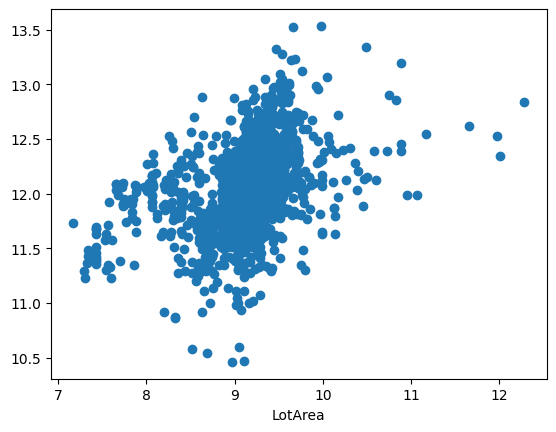

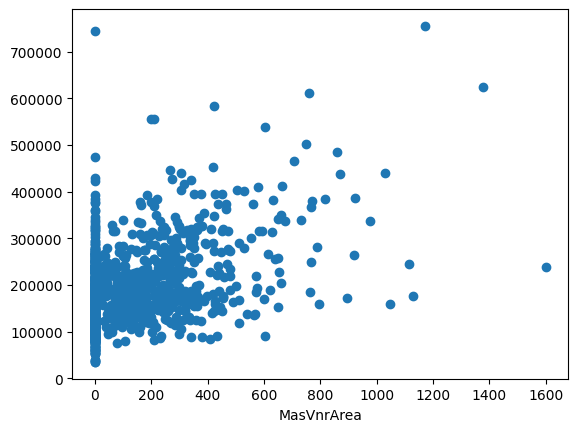

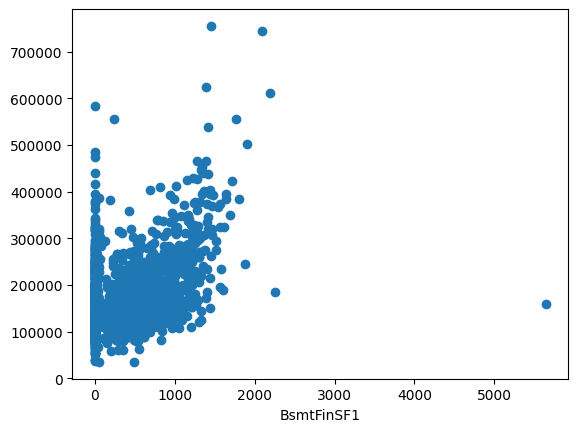

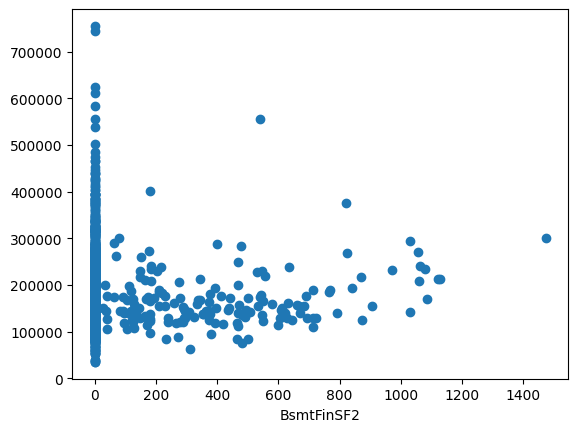

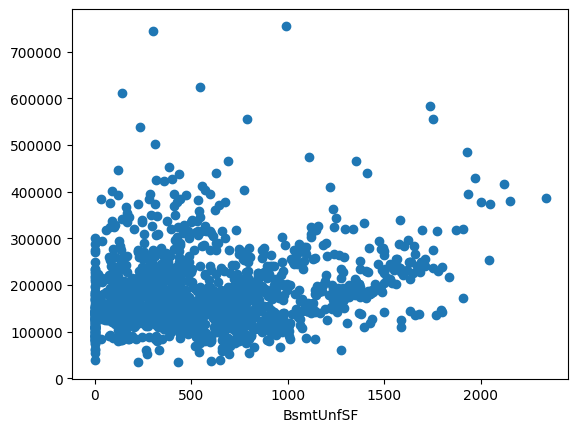

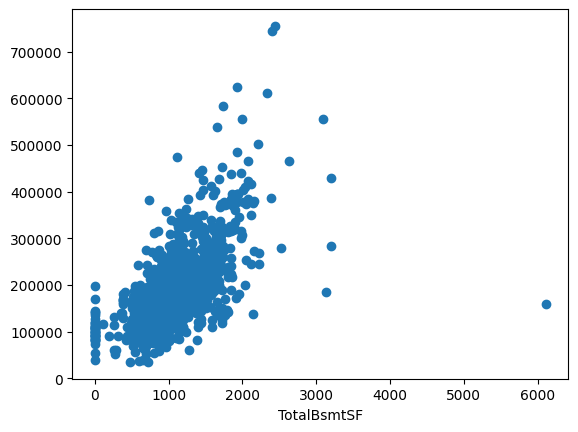

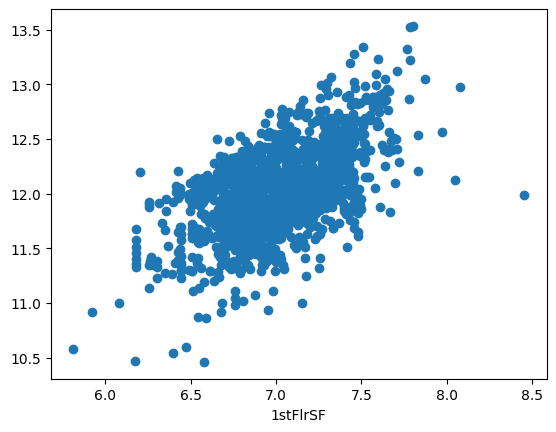

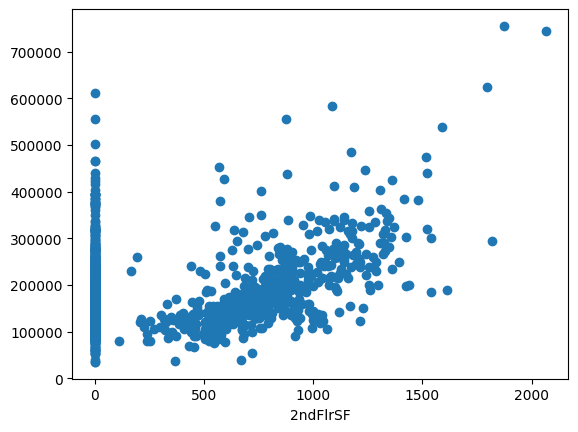

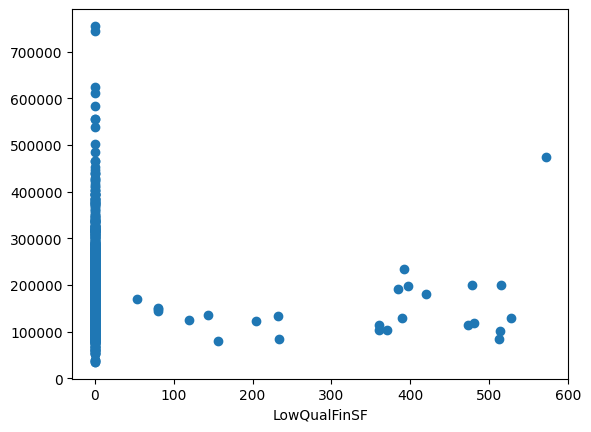

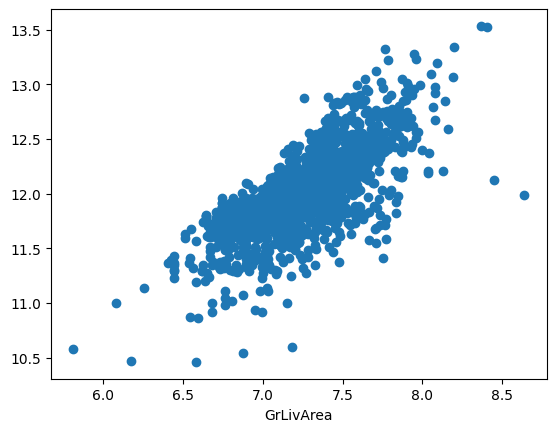

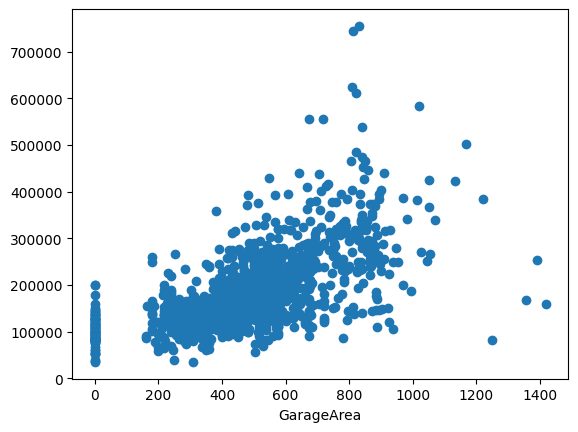

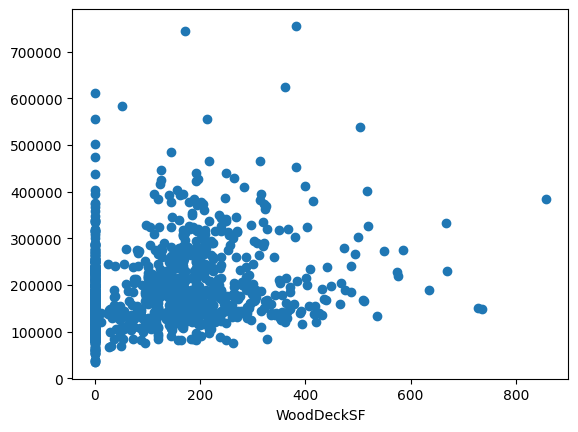

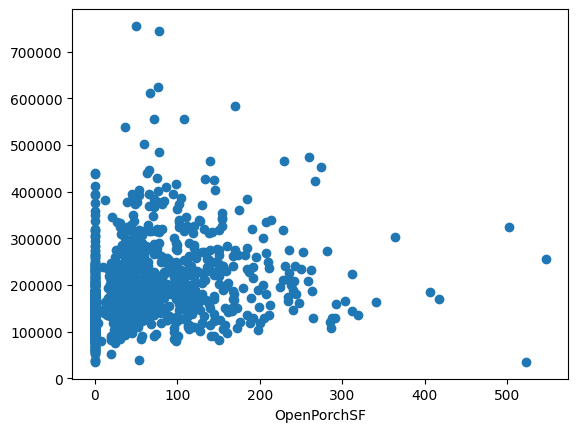

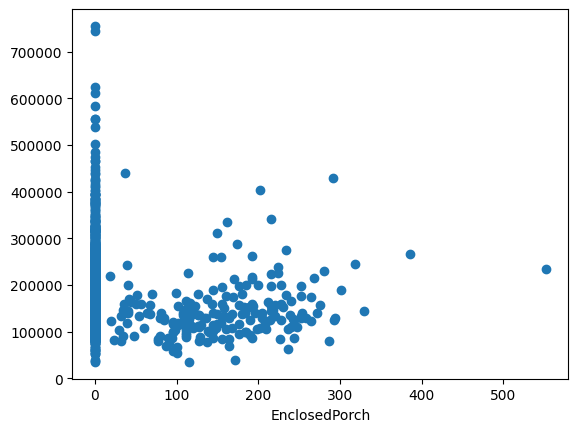

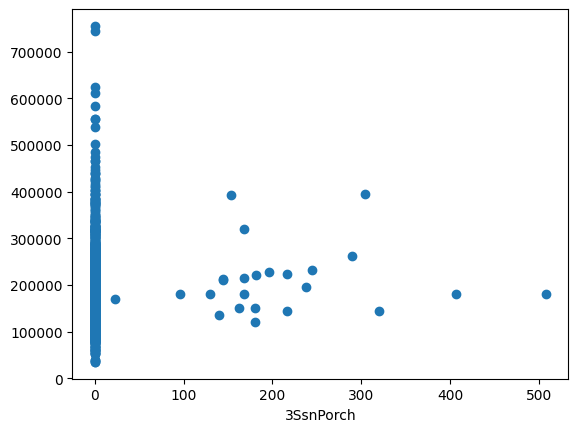

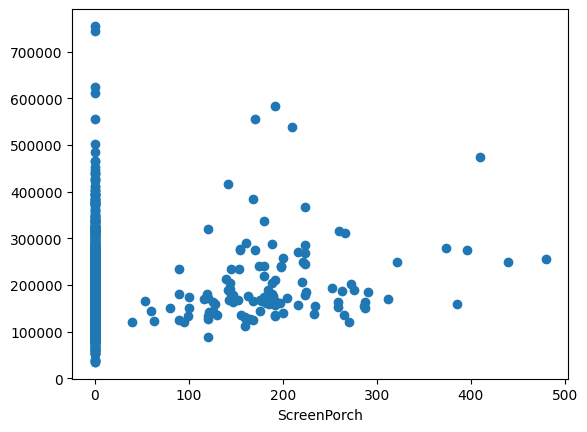

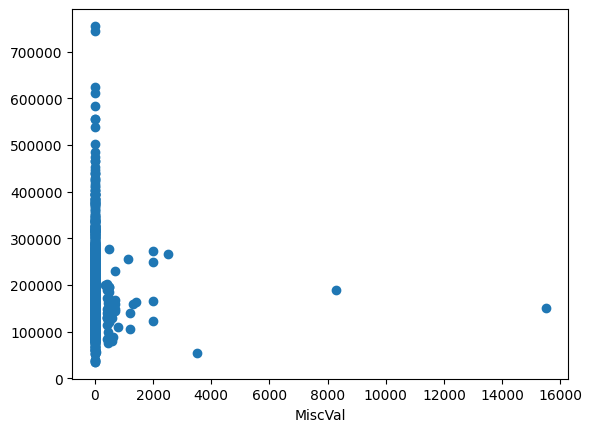

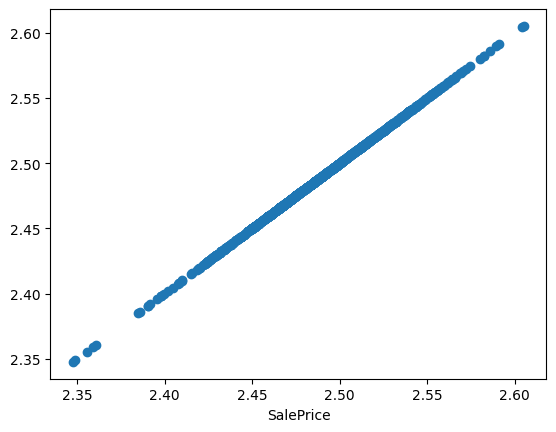

In [148]:
# for skewed data - use log normalisation
for i in con_col:
    data=df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[i],data['SalePrice'])
    plt.xlabel(i)
    plt.show()
    
    

# finding outliers using boxplot (only found in Continuous variable)

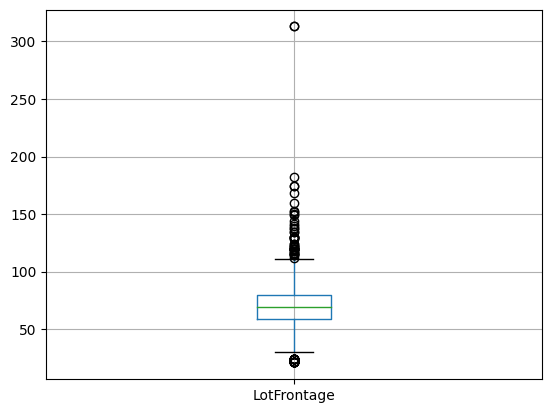

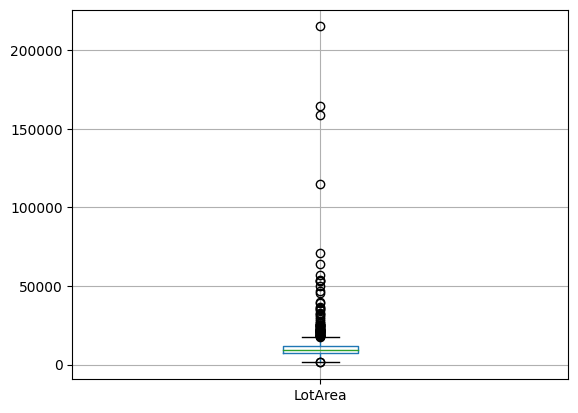

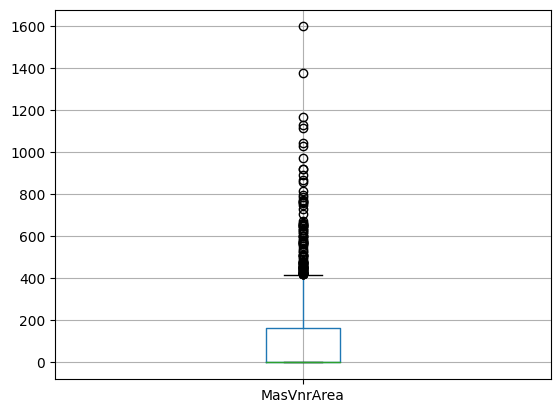

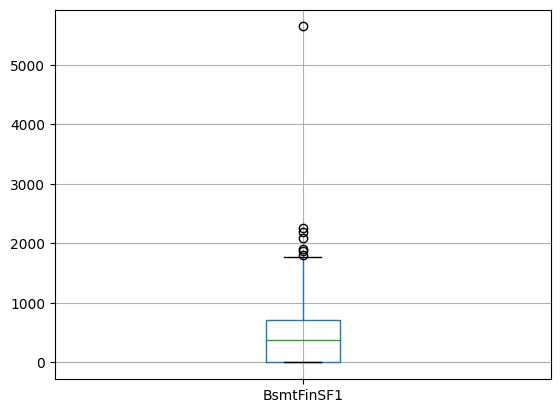

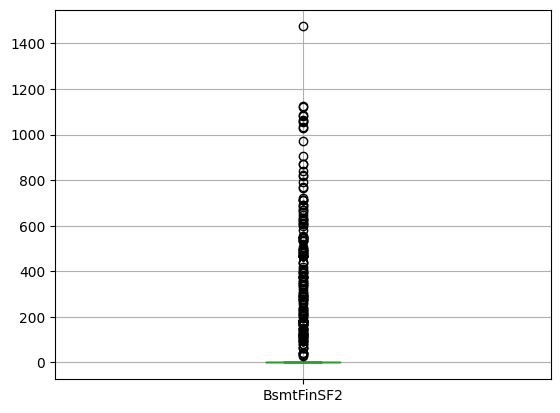

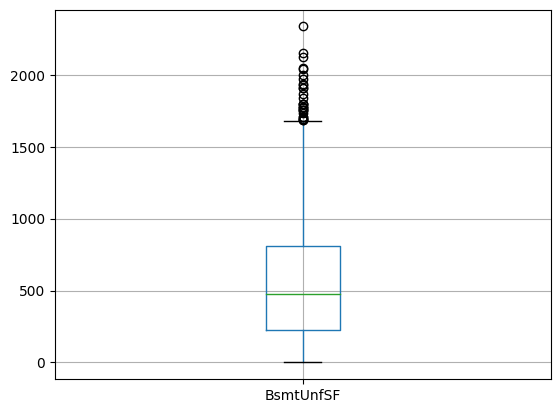

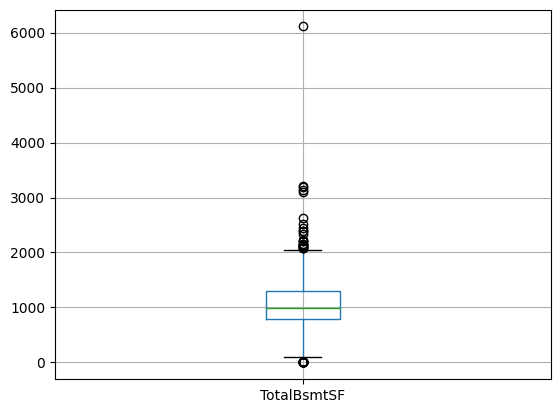

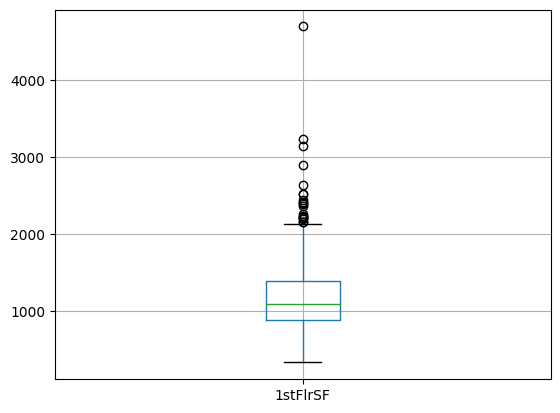

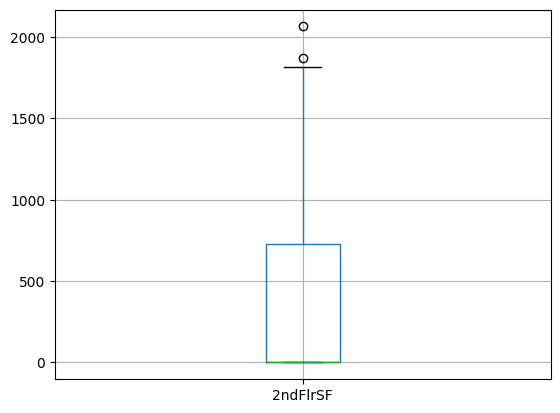

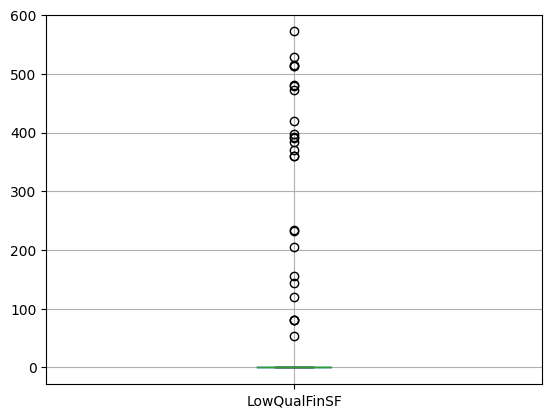

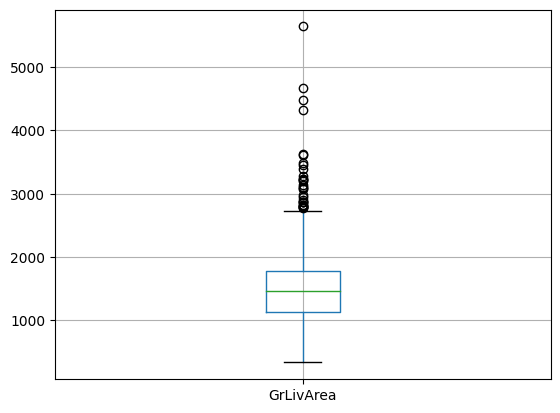

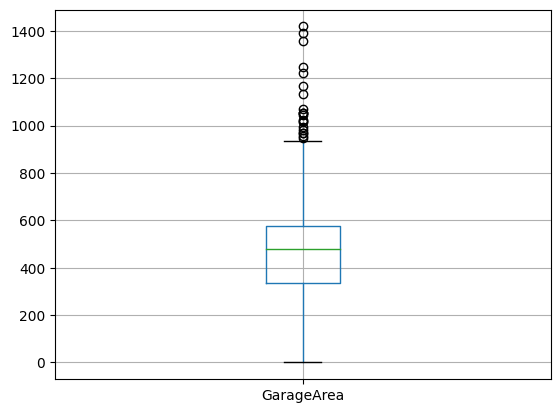

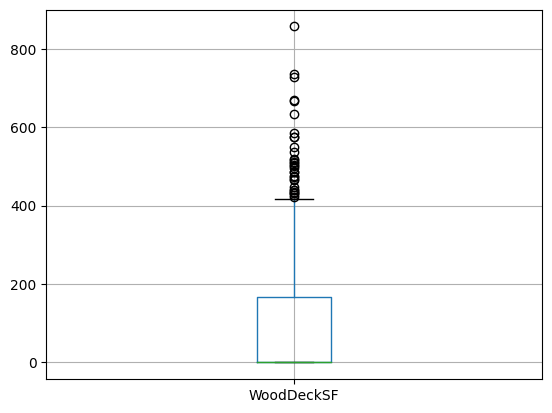

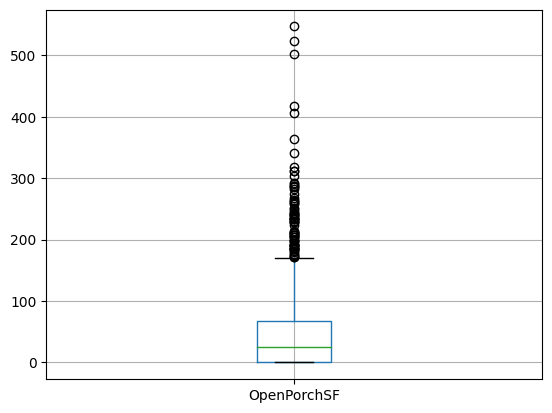

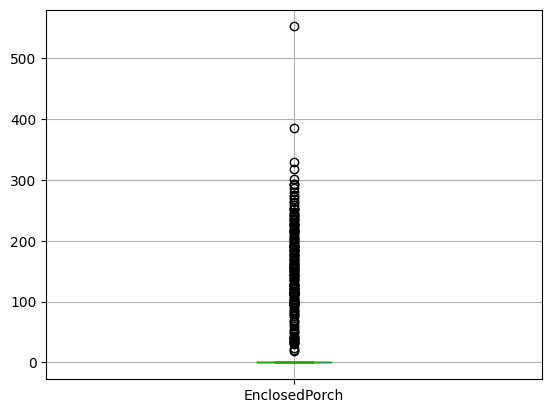

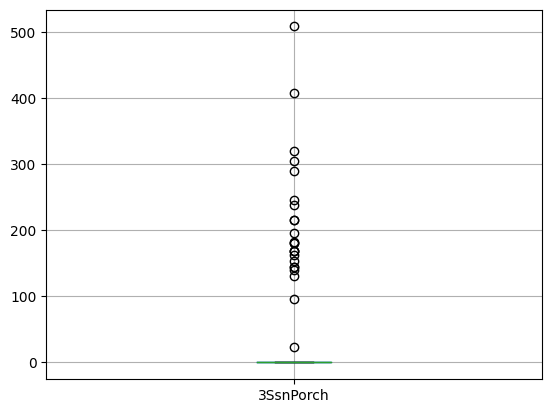

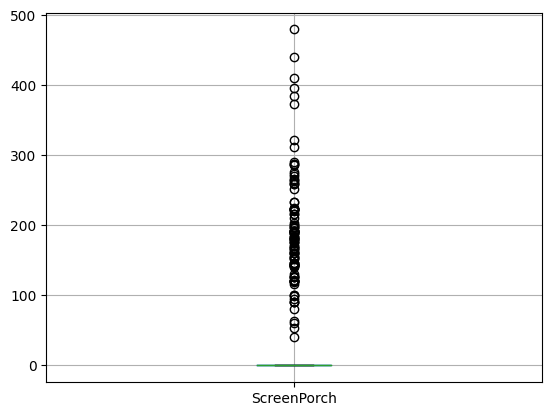

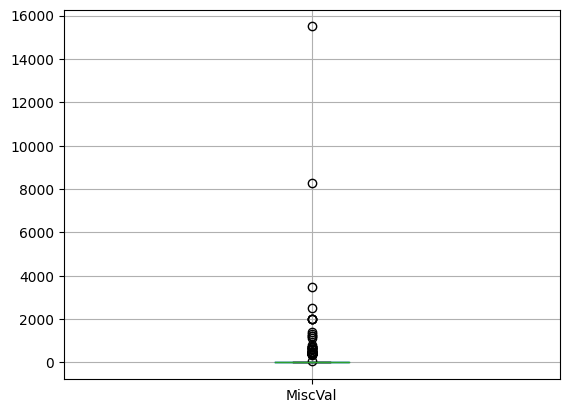

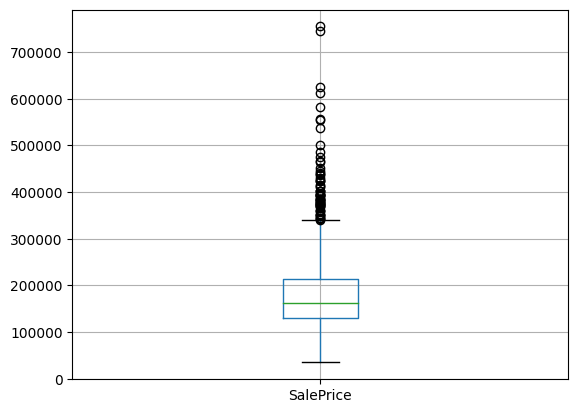

In [153]:
for i in con_col:
    data=df.copy()
    data.boxplot(column=i)
    plt.show()

# Categorical features (where dtype is object type, other than numerical)

In [156]:
cat_col=[i for i in df.columns if df[i].dtype=='O']
df[cat_col].head()

,MSZoning,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,WD,Normal


In [162]:
df[cat_col].shape

(1460, 43)

In [160]:
for i in cat_col:
    print('number of categories in {} is {}'.format(i, df[i].nunique()))

number of categories in MSZoning is 5
number of categories in Street is 2
number of categories in Alley is 2
number of categories in LotShape is 4
number of categories in LandContour is 4
number of categories in Utilities is 2
number of categories in LotConfig is 5
number of categories in LandSlope is 3
number of categories in Neighborhood is 25
number of categories in Condition1 is 9
number of categories in Condition2 is 8
number of categories in BldgType is 5
number of categories in HouseStyle is 8
number of categories in RoofStyle is 6
number of categories in RoofMatl is 8
number of categories in Exterior1st is 15
number of categories in Exterior2nd is 16
number of categories in MasVnrType is 4
number of categories in ExterQual is 4
number of categories in ExterCond is 5
number of categories in Foundation is 6
number of categories in BsmtQual is 4
number of categories in BsmtCond is 4
number of categories in BsmtExposure is 4
number of categories in BsmtFinType1 is 6
number of categ

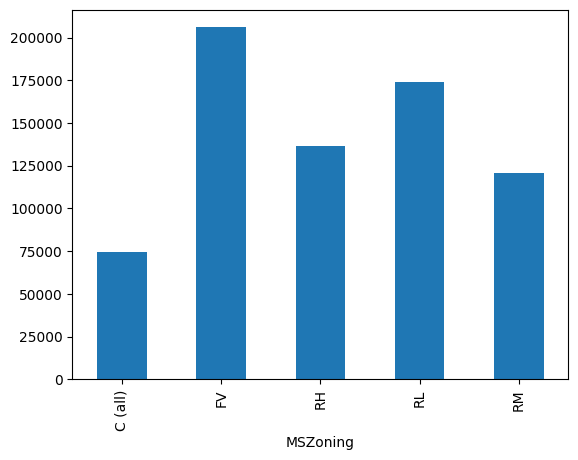

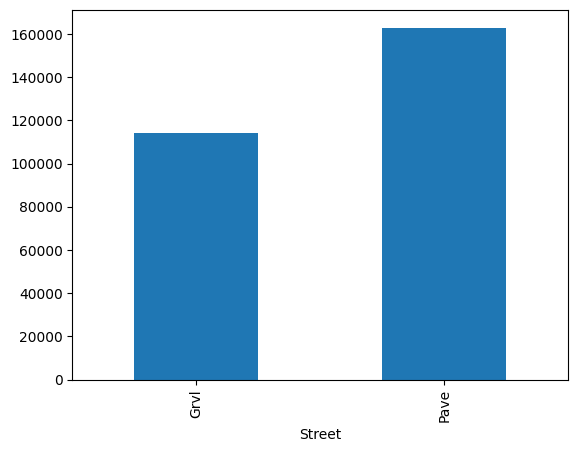

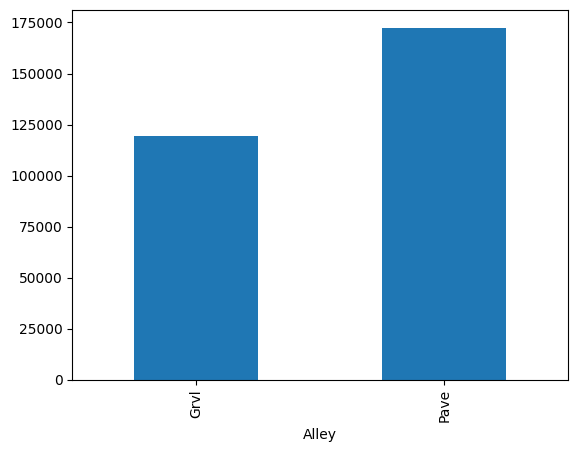

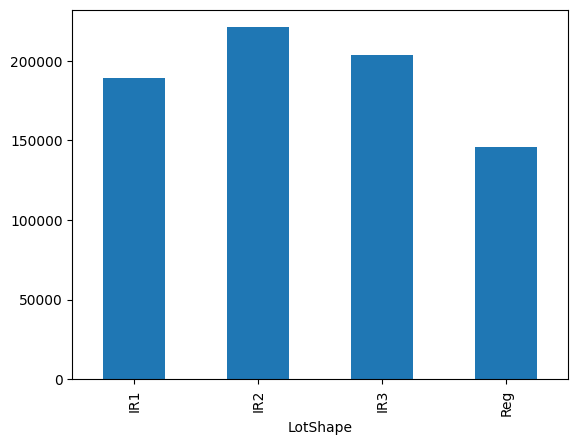

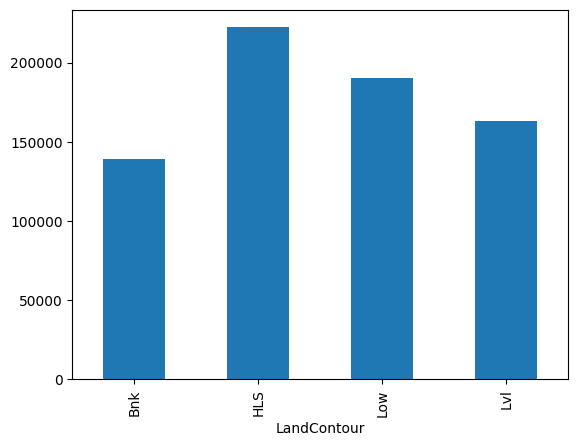

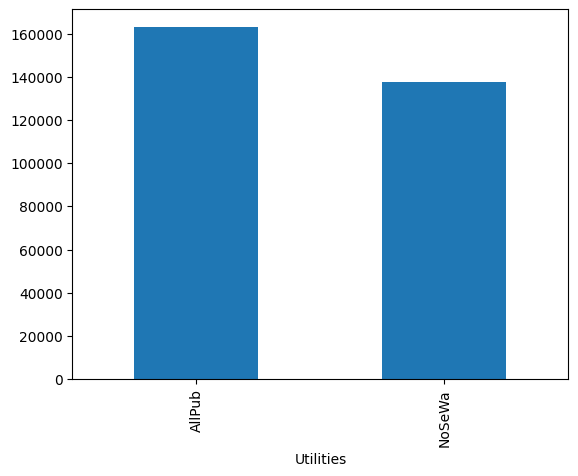

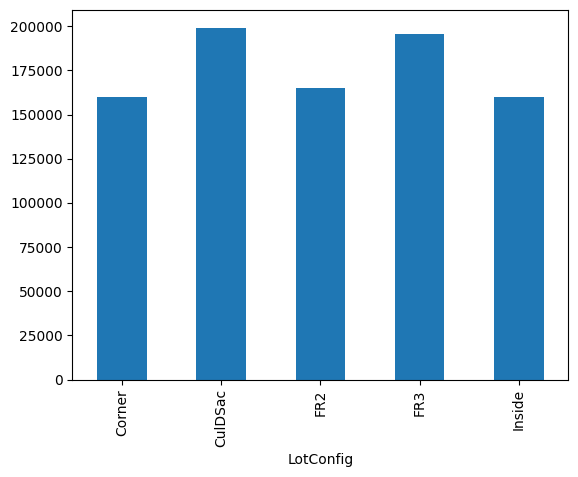

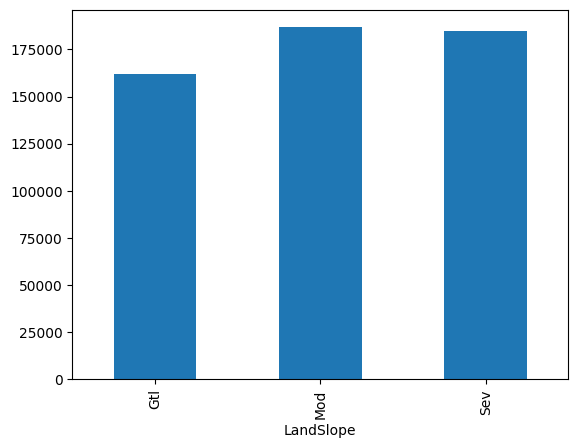

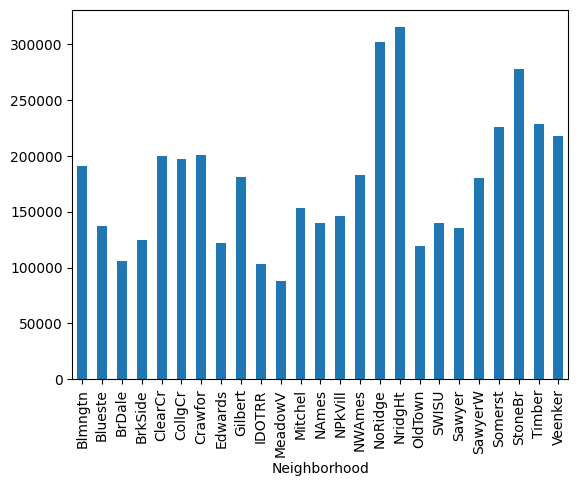

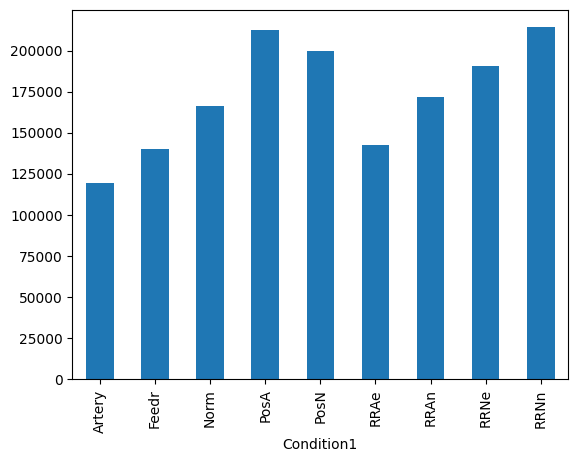

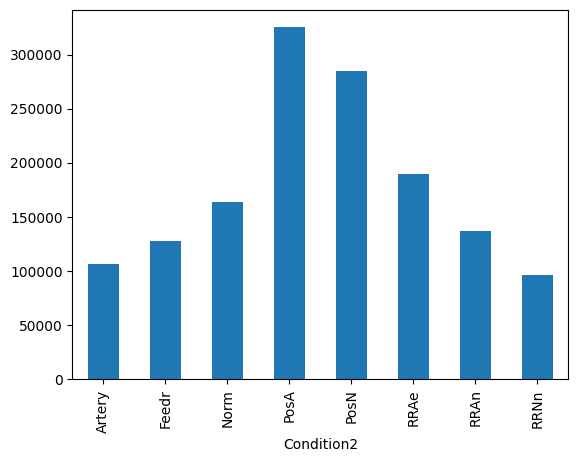

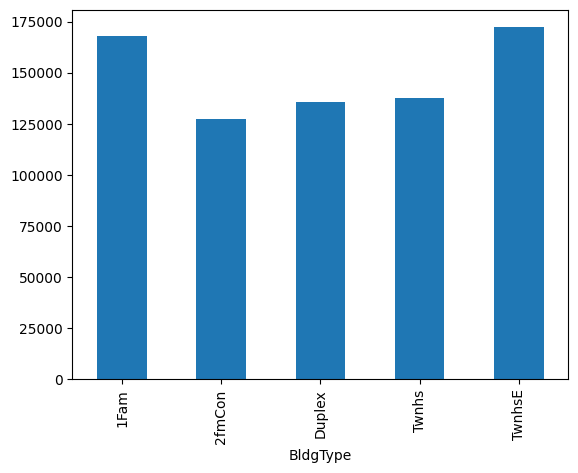

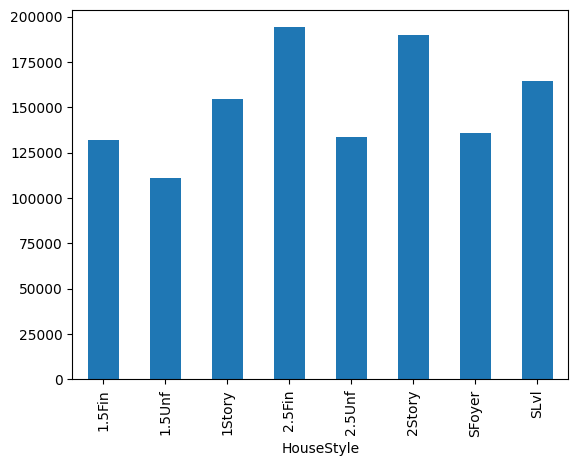

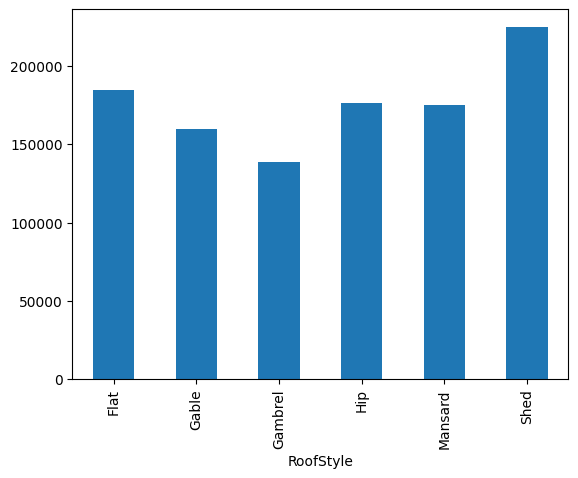

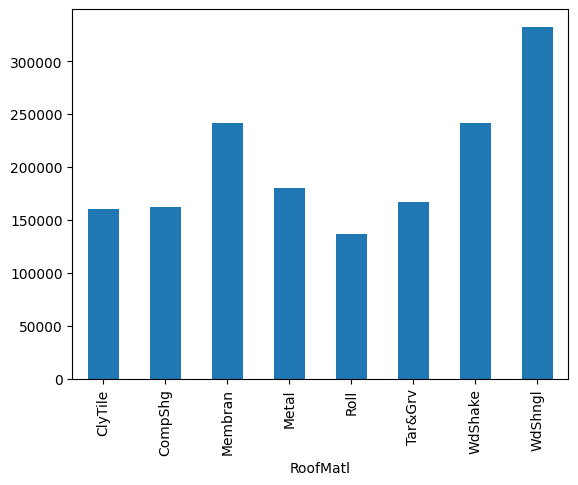

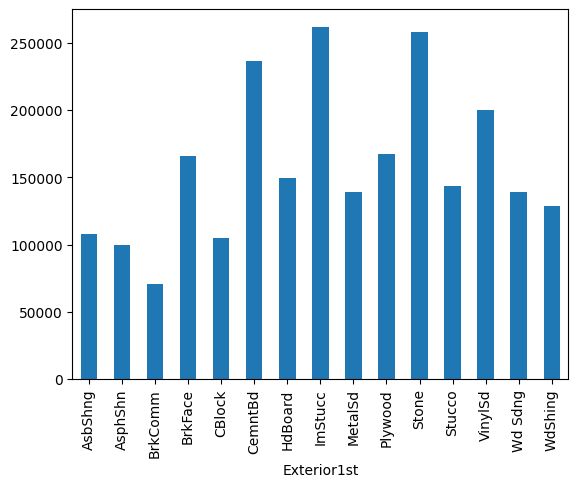

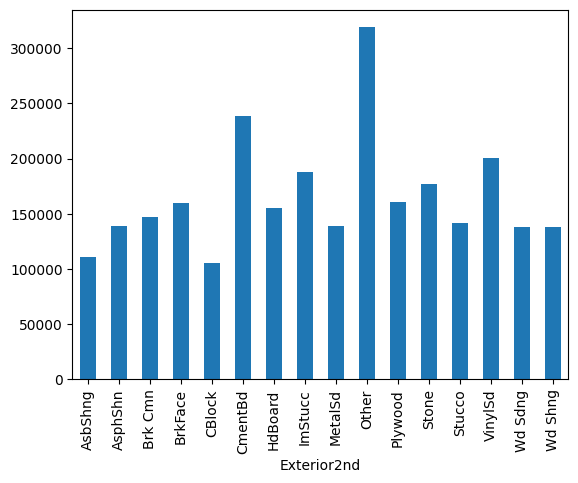

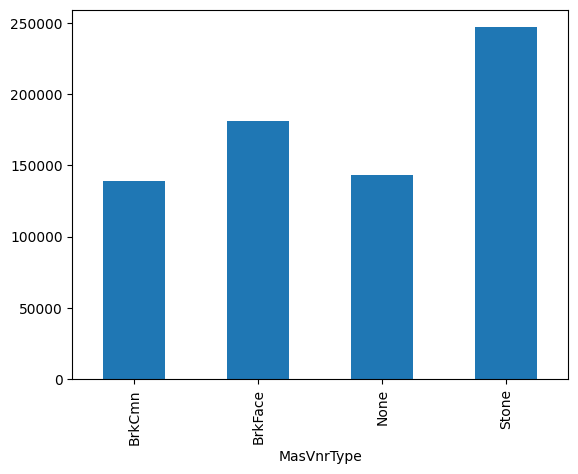

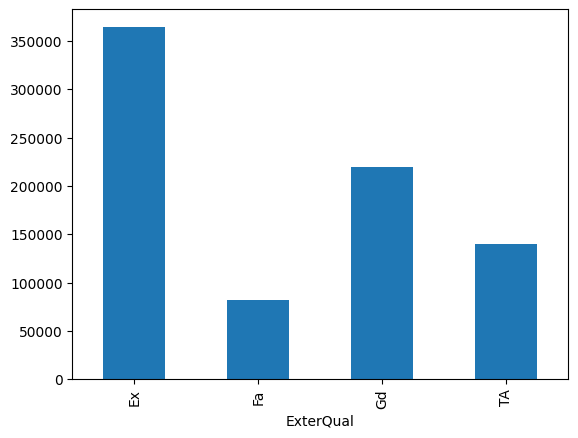

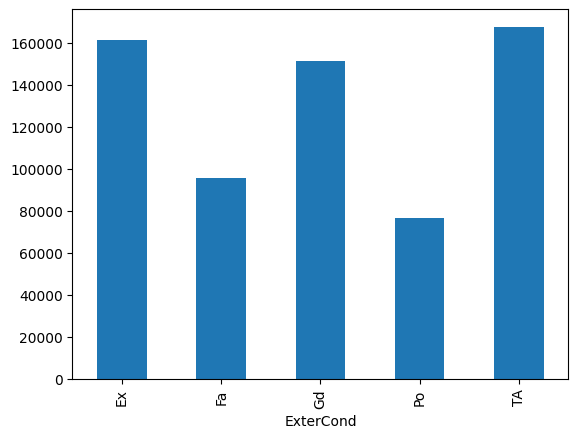

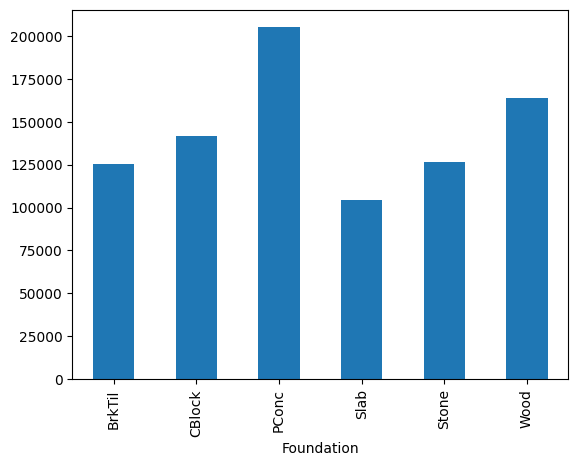

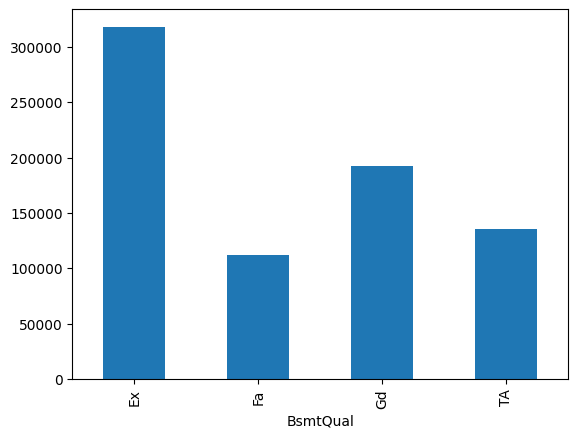

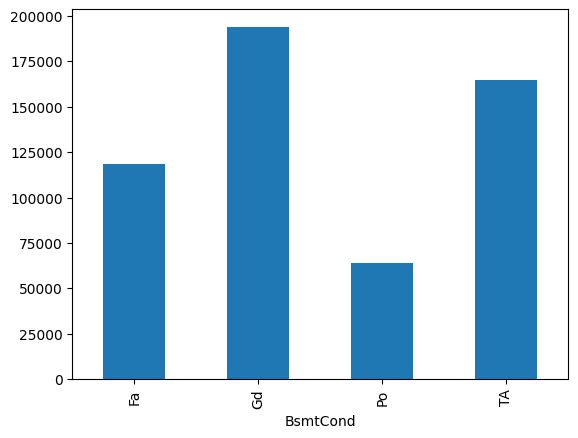

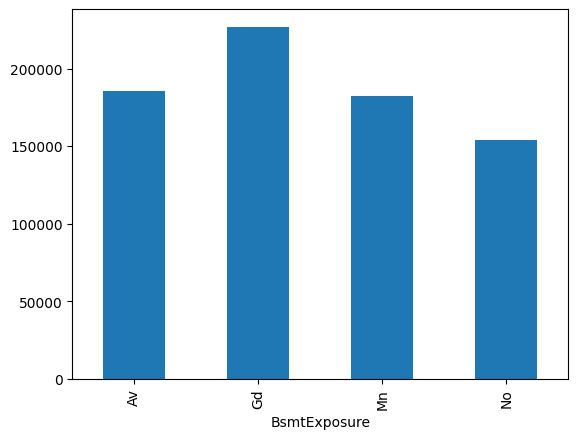

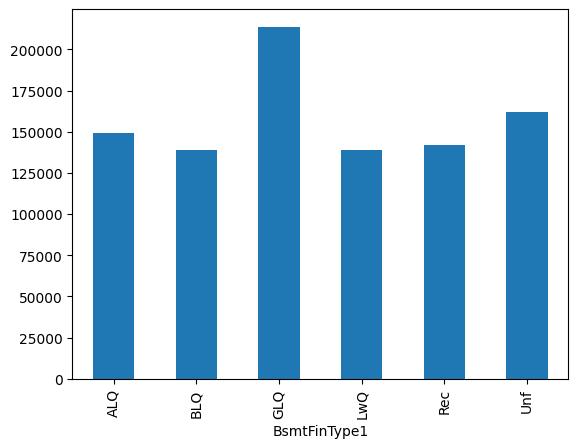

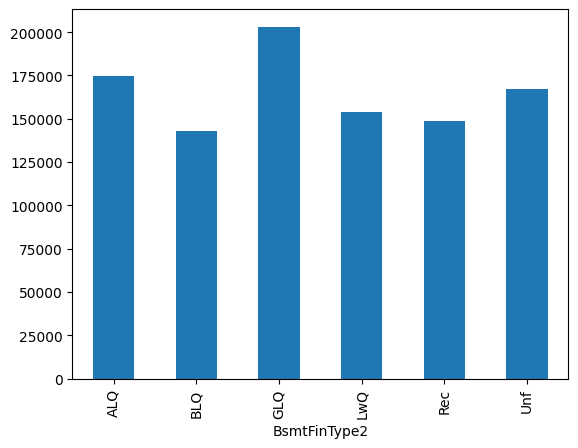

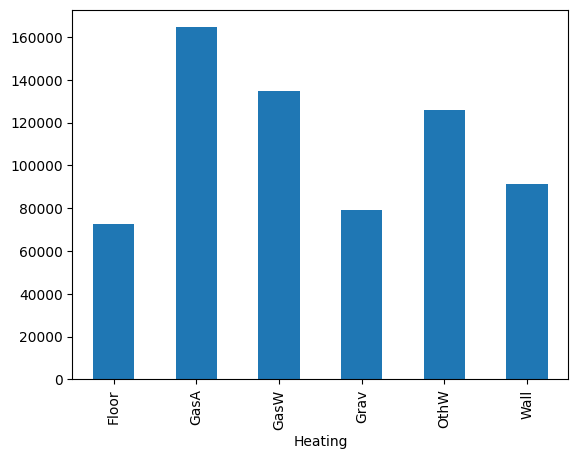

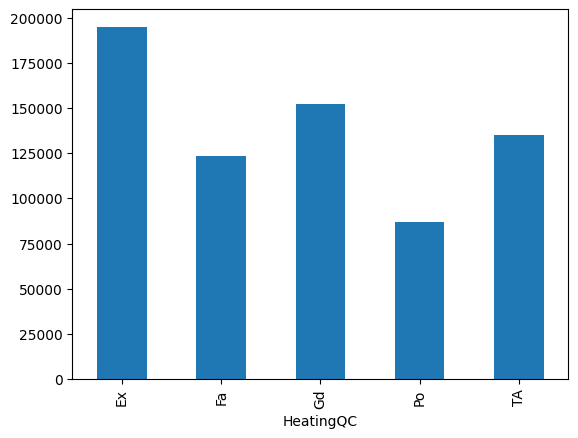

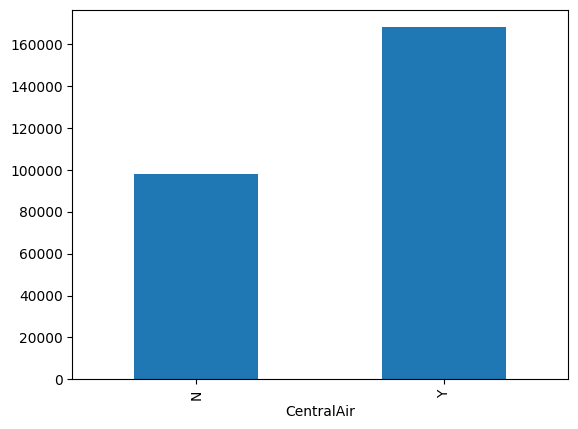

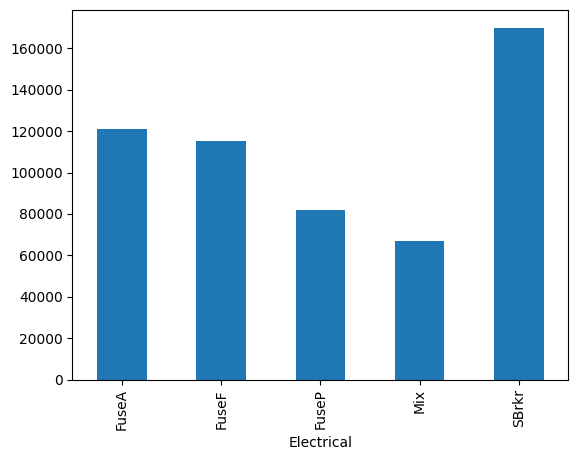

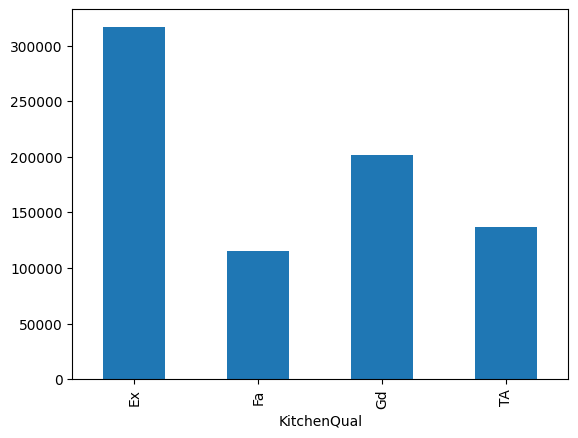

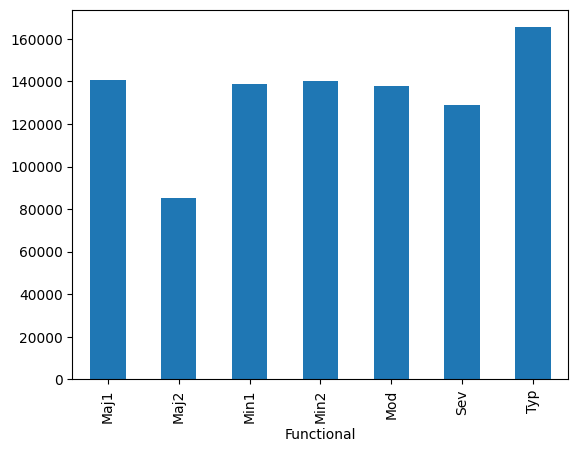

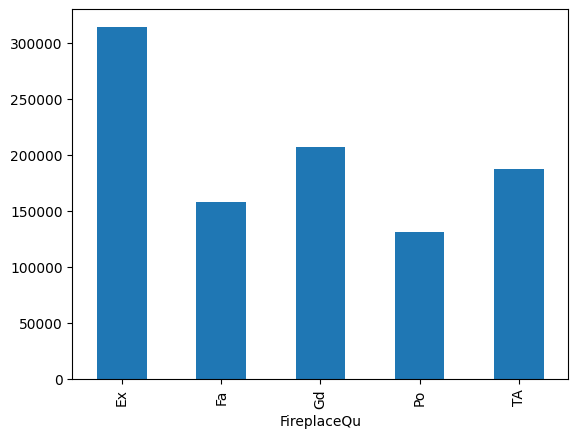

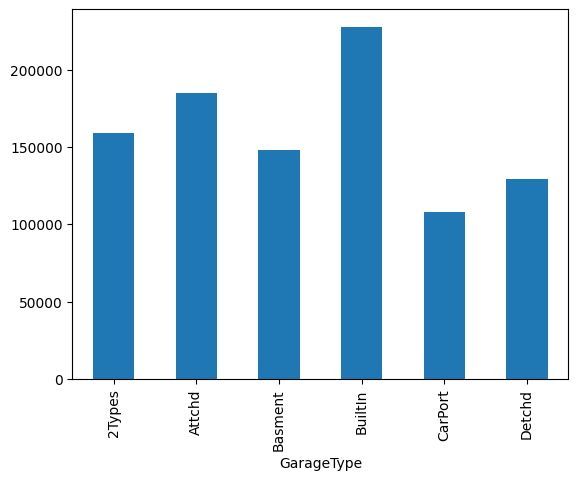

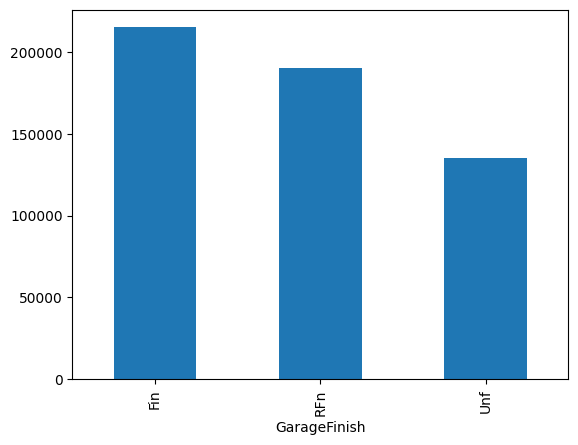

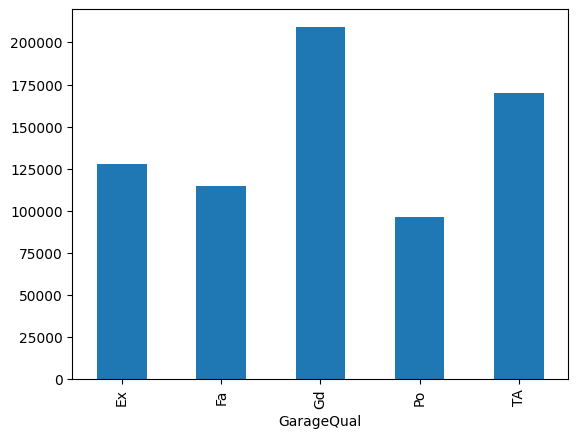

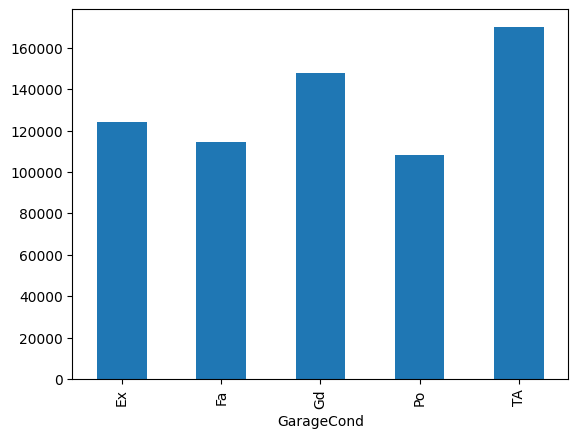

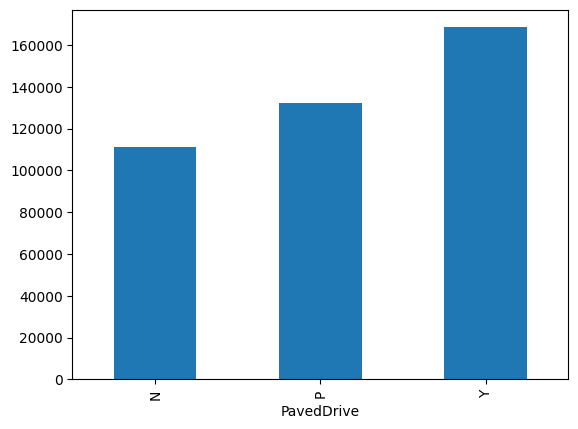

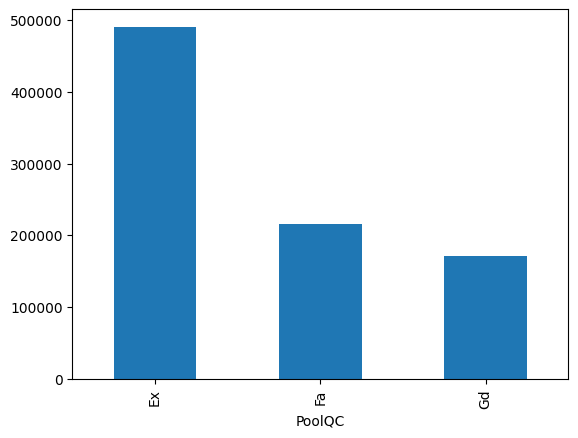

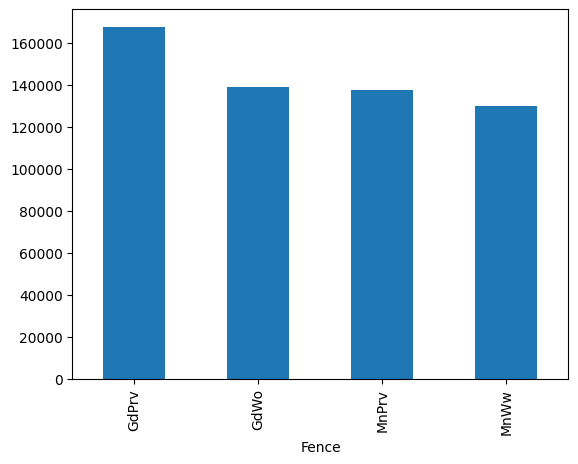

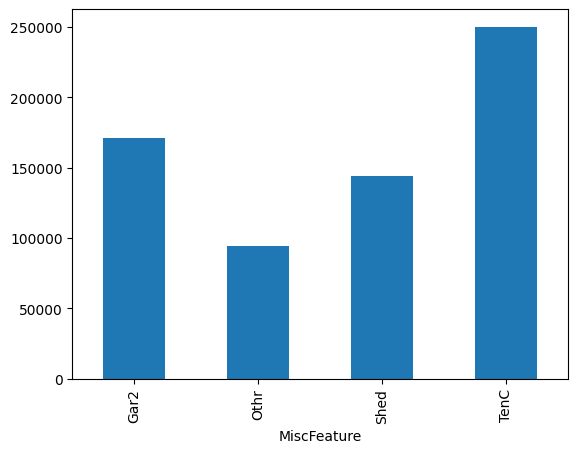

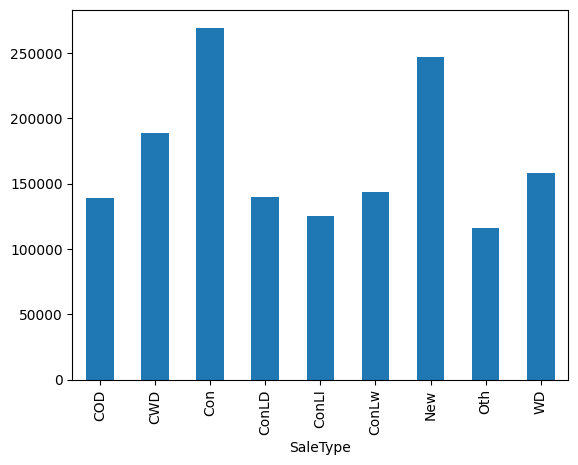

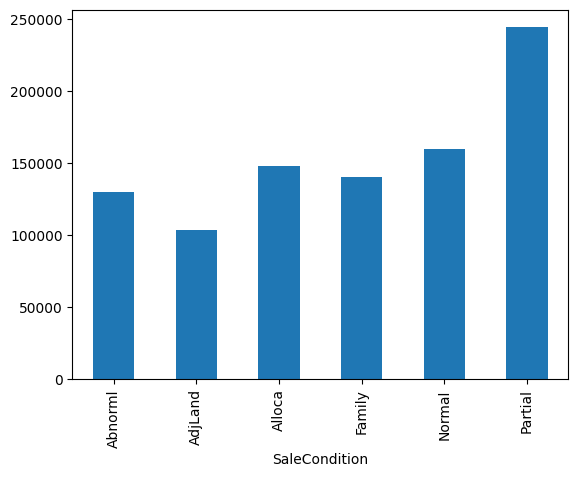

In [170]:
for i in cat_col:
    data=df.copy()
    data.groupby([i])['SalePrice'].median().plot.bar()
#         data.groupby([i])['SalePrice'].mean().plot.bar()
# mean not possible for categorical feature
    plt.show()